__Project Description:__


In present times, increased number of transaction frauds has enhanced need for fraud detection and prevention systems. Transaction fraud detection is now known as critical process for identification and prevention of fraudulent activities in financial transactions. This process involves use of advanced ML algorithms, data analytics, analysis of transaction patterns, and anomalies in transaction data. Using these advanced approaches, various parameters such as location, transaction amount, and frequency can be monitored to detect any unusual behaviour indicating frauds. Real-time monitoring and adaptive algorithms contribute to the effectiveness of fraud detection, enabling swift intervention to prevent unauthorized transactions and protect both consumers and financial institutions from potential losses.



__Dataset Description:__  


Dataset used in this project was provided by Vesta Corporation in 2019 for a compeition on Kaggle.com. It contains real-time transaction details such as user details (device type, OS system), location, transaction amount, and other above 300 features for each transaction. The whole data set is broken into two files: identity and transaction files. These files are mergered using Transaction ID.  



__Baseline Data__

* TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
* TransactionAMT: Dollar Amount of transaction payments
* ProductCD: Each transaction product Code
* card1 - card6: Card details: type, category, bank name, issuing country & other details.
* addr: User address
* dist: distance (dist1 & dist2)
* P_emaildomain: purchaser email domain
* R_emaildomain: receiptionist email domain
* C1-C14: counting n of addresses
* D1-D15: timedelta considering previous transaction.
* M1-M9: Information match (card address and name)
* V1-V339: Vesta engineered rich features, including ranking, counting, and other entity relations.

__Dependencies loading__
<br><br>

In [456]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from pathlib import Path

pd.set_option("display.max_columns", 500)

#@__Loading and Merging the Datasets__
<br>

__Data prepration:__
Here we are loading our dataset from 4 CSV files. Transaction dataset files contain transactions related details e.g., card address, timedelta, distance, and V1_V3xx. Identity dataset files contain information about user identities, device types, and OS systems. When transaction and identity files are further classified as Training (to train models) and Testing datasets.

In [457]:
# Loading Train Dataset

train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')

# Loading Test Dataset

test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')

In [458]:
print("Train Transaction Dataset Shape : ",train_transaction.shape)
print("Train Identity Dataset Shape : ",train_identity.shape)
print('-'*50)
print("Test Transaction Dataset Shape : ",test_transaction.shape)
print("Test Identity Dataset Shape : ",test_identity.shape)

Train Transaction Dataset Shape :  (101477, 394)
Train Identity Dataset Shape :  (144233, 41)
--------------------------------------------------
Test Transaction Dataset Shape :  (103391, 393)
Test Identity Dataset Shape :  (141907, 41)


In [459]:
# Merging the transaction and identity dataset

train_data = train_transaction.merge(train_identity, how='inner', on='TransactionID')
#NOTE: inner is used to join.
#del train_transaction, train_identity

test_data = test_transaction.merge(test_identity, how='inner', on='TransactionID')
#del test_transaction, test_identity

#@__Initial data exploration__

In [460]:
print("Train  Dataset Shape : ",train_data.shape)

print('-'*50)
print("Test  Dataset Shape : ",test_data.shape)


Train  Dataset Shape :  (42309, 434)
--------------------------------------------------
Test  Dataset Shape :  (18949, 433)


In [461]:
train_data.sample(5)

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
26992        3060026        0        1625039           100.0         R  16657   
32001        3069762        0        1784202            25.0         H   9749   
21580        3049002        0        1396404           100.0         R  12501   
9956         3021274        0         849236           125.0         R   7585   
27215        3060481        0        1629210            50.0         H   9785   

       card2  card3 card4  card5   card6  addr1  addr2  dist1  dist2  \
26992  502.0  150.0  visa  226.0   debit  181.0   87.0    NaN    NaN   
32001  181.0  150.0  visa  226.0  credit  308.0   87.0    NaN    NaN   
21580  490.0  150.0  visa  226.0   debit  204.0   87.0    NaN    NaN   
9956   553.0  150.0  visa  226.0  credit  315.0   87.0    NaN    NaN   
27215  343.0  150.0  visa  100.0   debit  204.0   87.0    NaN    NaN   

      P_emaildomain R_emaildomain   C1   C2   C3   C4   C5   C6   C7   C8  \
26992   hotmail.com   hotmail.com  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0   
32001       cox.net       cox.net  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0   
21580     gmail.com     gmail.com  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0   
9956    hotmail.com   hotmail.com  1.0  1.0  0.0  1.0  0.0  1.0  0.0  1.0   
27215     yahoo.com           NaN  1.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0   

        C9  C10  C11  C12  C13  C14   D1  D2  D3   D4  D5   D6  D7  \
26992  0.0  1.0  1.0  0.0  0.0  0.0  0.0 NaN NaN  NaN NaN  NaN NaN   
32001  0.0  1.0  1.0  0.0  1.0  1.0  0.0 NaN NaN  0.0 NaN  0.0 NaN   
21580  0.0  1.0  1.0  0.0  1.0  1.0  0.0 NaN NaN  NaN NaN  NaN NaN   
9956   0.0  1.0  1.0  0.0  1.0  1.0  0.0 NaN NaN  NaN NaN  NaN NaN   
27215  0.0  1.0  1.0  0.0  1.0  1.0  0.0 NaN NaN  NaN NaN  NaN NaN   

               D8        D9  D10  D11  D12  D13  D14  D15   M1   M2   M3   M4  \
26992    0.791666  0.791666  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
32001         NaN       NaN  0.0  NaN  NaN  NaN  0.0  NaN  NaN  NaN  NaN  NaN   
21580  239.125000  0.125000  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9956          NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
27215         NaN       NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

        M5   M6   M7   M8   M9  V1  V2  V3  V4  V5  V6  V7  V8  V9  V10  V11  \
26992  NaN  NaN  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN   
32001  NaN  NaN  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN   
21580  NaN  NaN  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN   
9956   NaN  NaN  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN   
27215  NaN  NaN  NaN  NaN  NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN  NaN  NaN   

       V12  V13  V14  V15  V16  V17  V18  V19  V20  V21  V22  V23  V24  V25  \
26992  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
32001  0.0  0.0  1.0  0.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0   
21580  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9956   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
27215  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       V26  V27  V28  V29  V30  V31  V32  V33  V34  V35  V36  V37  V38  V39  \
26992  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
32001  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  1.0   
21580  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
9956   NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
27215  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

       V40  V41  V42  V43  V44  V45  V46  V47  V48  V49  V50  V51  V52  V53  \
26992  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
32001  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  NaN   
21580  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  N

Data imputation

In [462]:
 thres = train_data.shape[0]

 th = int(thres * 0.9)

# Drop columns with more than the threshold count of missing values
train_data = train_data.dropna(axis=1, thresh= th)



print("Train  Dataset Shape : ",train_data.shape)

train_data.sample(5)

Train  Dataset Shape :  (42309, 244)


TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
37286        3079452        0        1908703          1000.0         R  16326   
25453        3057118        0        1566312            50.0         H   9749   
19314        3043848        0        1307085            75.0         H   8503   
32443        3070562        0        1791411           100.0         R  10486   
28437        3063028        0        1655567           125.0         R  11319   

       card2  card3       card4  card5   card6  P_emaildomain   C1   C2   C3  \
37286  321.0  150.0        visa  226.0  credit         me.com  2.0  1.0  0.0   
25453  181.0  150.0        visa  226.0  credit    hotmail.com  1.0  1.0  0.0   
19314  583.0  150.0        visa  226.0  credit    comcast.net  1.0  1.0  0.0   
32443  514.0  150.0  mastercard  219.0  credit  optonline.net  1.0  1.0  0.0   
28437  155.0  150.0        visa  226.0  credit      gmail.com  1.0  1.0  0.0   

        C4   C5   C6   C7   C8   C9  C10  C11  C12  C13  C14   D1   V95   V96  \
37286  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0  12.0  12.0   
25453  0.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0   0.0   0.0   
19314  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0   0.0   0.0   
32443  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0   0.0   0.0   
28437  1.0  0.0  1.0  0.0  1.0  0.0  1.0  1.0  0.0  1.0  1.0  0.0   0.0   0.0   

        V97  V98  V99  V100  V101  V102  V103  V104  V105  V106  V107  V108  \
37286  12.0  0.0  0.0   0.0   4.0   4.0   4.0   8.0   8.0   8.0   1.0   1.0   
25453   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   
19314   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   
32443   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   
28437   0.0  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   

       V109  V110  V111  V112  V113  V114  V115  V116  V117  V118  V119  V120  \
37286   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
25453   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
19314   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
32443   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
28437   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

       V121  V122  V123  V124  V125     V126     V127     V128  V129  V130  \
37286   1.0   1.0   2.0   2.0   2.0  12000.0  12000.0  12000.0   0.0   0.0   
25453   1.0   1.0   1.0   1.0   1.0      0.0      0.0      0.0   0.0   0.0   
19314   1.0   1.0   1.0   1.0   1.0      0.0      0.0      0.0   0.0   0.0   
32443   1.0   1.0   1.0   1.0   1.0      0.0      0.0      0.0   0.0   0.0   
28437   1.0   1.0   1.0   1.0   1.0      0.0      0.0      0.0   0.0   0.0   

       V131    V132    V133    V134    V135    V136    V137  V167  V168  V169  \
37286   0.0  4000.0  4000.0  4000.0  8000.0  8000.0  8000.0  12.0  12.0   0.0   
25453   0.0     0.0     0.0     0.0     0.0     0.0     0.0   0.0   0.0   0.0   
19314   0.0     0.0     0.0     0.0     0.0     0.0     0.0   0.0   0.0   0.0   
32443   0.0     0.0     0.0     0.0     0.0     0.0     0.0   0.0   0.0   0.0   
28437   0.0     0.0     0.0     0.0     0.0     0.0     0.0   0.0   0.0   0.0   

       V170  V171  V172  V173  V174  V175  V176  V177  V178  V179  V180  V181  \
37286  13.0  13.0   0.0   0.0   0.0   0.0   1.0   4.0   4.0   4.0   8.0   8.0   
25453   1.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
19314   1.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
32443   1.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   
28437   1.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   0.0   

       V182  V183  V184  V185  V186  V187  V188  V189  V190  V191  V192  V193  \
37286   8.0   8.0   8.0   8.0   1.0   1.0   1.0   1.0   1.0   1.0 

In [463]:
test_data.columns = test_data.columns.str.replace('^id-', 'id_', regex=True)

In [464]:
# Checking for Duplicate Rows in the training set

duplicate_rows = train_data[train_data.duplicated()]
print("Duplicate Rows :", duplicate_rows)

Duplicate Rows : Empty DataFrame
Columns: [TransactionID, isFraud, TransactionDT, TransactionAmt, ProductCD, card1, card2, card3, card4, card5, card6, P_emaildomain, C1, C2, C3, C4, C5, C6, C7, C8, C9, C10, C11, C12, C13, C14, D1, V95, V96, V97, V98, V99, V100, V101, V102, V103, V104, V105, V106, V107, V108, V109, V110, V111, V112, V113, V114, V115, V116, V117, V118, V119, V120, V121, V122, V123, V124, V125, V126, V127, V128, V129, V130, V131, V132, V133, V134, V135, V136, V137, V167, V168, V169, V170, V171, V172, V173, V174, V175, V176, V177, V178, V179, V180, V181, V182, V183, V184, V185, V186, V187, V188, V189, V190, V191, V192, V193, V194, V195, V196, ...]
Index: []



No duplicate rows are present in the dataset.
<br><br>

In [465]:
# Checking for duplicate columns

def getDuplicateColumns(df):

    '''
    Utility Function to get a list of duplicate columns.
    '''

    totalduplicateColumnNames = set()
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
                totalduplicateColumnNames.add(df.columns.values[x])
                totalduplicateColumnNames.add(df.columns.values[y])
    print(totalduplicateColumnNames)
    return list(duplicateColumnNames)

duplicate_columns = getDuplicateColumns(train_data)

print(duplicate_columns)

{'C5', 'C9'}
['C9']


In [466]:
train_data = train_data.drop(duplicate_columns,axis = 1)

In [467]:
print(train_data.shape)
train_data.sample(5)

(42309, 243)


TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
23360        3052812        0        1474270          50.000         H   6892   
6738         3012490        0         663251          78.788         C  17332   
30562        3067022        0        1724923           7.579         C   4461   
24268        3054510        0        1534612          50.371         C  14998   
36243        3077466        0        1888120          25.000         H  16661   

       card2  card3       card4  card5   card6  P_emaildomain   C1    C2   C3  \
23360  560.0  150.0        visa  226.0  credit        aol.com  1.0   1.0  0.0   
6738   540.0  106.0        visa  137.0  credit      gmail.com  1.0   2.0  0.0   
30562  375.0  185.0  mastercard  224.0   debit    hotmail.com  2.0  18.0  0.0   
24268  562.0  150.0  mastercard  219.0  credit  anonymous.com  1.0   3.0  0.0   
36243  490.0  150.0        visa  226.0   debit    hotmail.com  1.0   1.0  0.0   

        C4   C5   C6   C7   C8  C10  C11  C12   C13  C14   D1  V95  V96  V97  \
23360  0.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   1.0  1.0  0.0  0.0  0.0  0.0   
6738   1.0  0.0  1.0  1.0  2.0  1.0  1.0  1.0   3.0  1.0  4.0  2.0  2.0  2.0   
30562  2.0  0.0  2.0  2.0  9.0  6.0  3.0  3.0  10.0  2.0  0.0  0.0  0.0  0.0   
24268  1.0  0.0  1.0  1.0  1.0  1.0  1.0  1.0   1.0  1.0  0.0  0.0  0.0  0.0   
36243  1.0  0.0  1.0  0.0  1.0  1.0  1.0  0.0   1.0  1.0  0.0  0.0  0.0  0.0   

       V98  V99  V100  V101  V102  V103  V104  V105  V106  V107  V108  V109  \
23360  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   
6738   2.0  2.0   2.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   
30562  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   
24268  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   
36243  0.0  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   

       V110  V111  V112  V113  V114  V115  V116  V117  V118  V119  V120  V121  \
23360   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
6738    1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
30562   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
24268   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
36243   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

       V122  V123  V124  V125       V126       V127       V128       V129  \
23360   1.0   1.0   1.0   1.0   0.000000   0.000000   0.000000   0.000000   
6738    1.0   1.0   1.0   1.0  49.544399  49.544399  49.544399  49.544399   
30562   1.0   1.0   1.0   1.0   0.000000   0.000000   0.000000   0.000000   
24268   1.0   1.0   1.0   1.0   0.000000   0.000000   0.000000   0.000000   
36243   1.0   1.0   1.0   1.0   0.000000   0.000000   0.000000   0.000000   

            V130       V131  V132  V133  V134  V135  V136  V137  V167  V168  \
23360   0.000000   0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   
6738   49.544399  49.544399   0.0   0.0   0.0   0.0   0.0   0.0   2.0   2.0   
30562   0.000000   0.000000   0.0   0.0   0.0   0.0   0.0   0.0   6.0   6.0   
24268   0.000000   0.000000   0.0   0.0   0.0   0.0   0.0   0.0   2.0   2.0   
36243   0.000000   0.000000   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

       V169  V170  V171  V172  V173  V174  V175  V176  V177  V178  V179  V180  \
23360   0.0   1.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   
6738    2.0   3.0   3.0   2.0   2.0   2.0   2.0   1.0   0.0   0.0   0.0   0.0   
30562   0.0   0.0   0.0   1.0   1.0   0.0   0.0   7.0   3.0   3.0   3.0   2.0   
24268   2.0   3.0   3.0   1.0   1.0   1.0   1.0   3.0   1.0   1.0   1.0   0.0   
36243   0.0   1.0   1.0   0.0   0.0   0.0   0.0   1.0   0.0   0.0   0.0   0.0   

       V181  V182  V183  V184  V185  V186  V187  V188  V189  V190  V191  V192  \
23360   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
673

selecting categorical and numerical features

In [468]:
def cat_num_features(df):


    numf = ['TransactionAmt']
    # Updating the cat Feature Names List based on the columns present in the dataframe
    catf = [feature for feature in df.columns if feature not in numf and not feature == 'isFraud']

    return (catf, numf)

In [469]:
# Sorting the Dataframe by the TransactionDT column

train_data.sort_values(by='TransactionDT' ,inplace=True)
test_data.sort_values(by='TransactionDT' , inplace=True)

In [470]:
# Saving the merged train and test dataset into pickle format

train_data.to_pickle('merged_train.pkl')
test_data.to_pickle('merged_test.pkl')

del train_data, test_data

In [471]:
# Loading the merged train and test dataset

train_data = pd.read_pickle("merged_train.pkl")
test_data = pd.read_pickle("merged_test.pkl")

In [472]:
print("*"*35)
print("\n Train Data Shape : {} \n".format(train_data.shape))
print("\n Test Data Shape : {} \n".format(test_data.shape))
print("*"*35)

***********************************

 Train Data Shape : (42309, 243) 


 Test Data Shape : (18949, 433) 

***********************************


Missing Values
<br>

In [473]:
def missing_info(column, df):

    '''
        Utility Function to compute the missing value info
        of any feature in a dataset.
    '''

    na = df[column].isna()
    count = na.sum()
    total_count = df.shape[0]
    miss_prcnt = np.round((count/total_count)*100,3)

    return (count, miss_prcnt)

In [474]:
def missing_train_info(df):
    '''
        Utility Function to get information about missing values in the dataframe,
        for each column the following information is given by this function.

            - Number of missing values present in the column.
            - Percentage of missing values in the column.
    '''

    columns_missing_info = []

    for column in df:

        count, miss_prcnt = missing_info(column, df);

        if(count):
            columns_missing_info.append([column, count, miss_prcnt])

    column_names = ['Feature_Name', 'Missing_Count', 'Missing_Percentage']

    missing_info_df = pd.DataFrame(data = columns_missing_info, columns = column_names)

    return missing_info_df

In [475]:
missing_train_df = missing_train_info(train_data)

In [476]:
# Modifying the display setting of the pandas so as to view all the rows in a dataframe

pd.set_option("display.max_rows", None, "display.max_columns", None)
# pd.reset_option("display.max_rows", "display.max_columns")

In [477]:
missing_train_df.head(train_data.shape[1])

Feature_Name  Missing_Count  Missing_Percentage
0            card2            153               0.362
1            card3              1               0.002
2            card4              5               0.012
3            card5            261               0.617
4            card6              2               0.005
5    P_emaildomain           2624               6.202
6             V167           1876               4.434
7             V168           1876               4.434
8             V169           1876               4.434
9             V170           1876               4.434
10            V171           1876               4.434
11            V172           1876               4.434
12            V173           1876               4.434
13            V174           1876               4.434
14            V175           1876               4.434
15            V176           1876               4.434
16            V177           1876               4.434
17            V178           1876               4.434
18            V179           1876               4.434
19            V180           1876               4.434
20            V181           1876               4.434
21            V182           1876               4.434
22            V183           1876               4.434
23            V184           1876               4.434
24            V185           1876               4.434
25            V186           1876               4.434
26            V187           1876               4.434
27            V188           1876               4.434
28            V189           1876               4.434
29            V190           1876               4.434
30            V191           1876               4.434
31            V192           1876               4.434
32            V193           1876               4.434
33            V194           1876               4.434
34            V195           1876               4.434
35            V196           1876               4.434
36            V197           1876               4.434
37            V198           1876               4.434
38            V199           1876               4.434
39            V200           1876               4.434
40            V201           1876               4.434
41            V202           1876               4.434
42            V203           1876               4.434
43            V204           1876               4.434
44            V205           1876               4.434
45            V206           1876               4.434
46            V207           1876               4.434
47            V208           1876               4.434
48            V209           1876               4.434
49            V210           1876               4.434
50            V211           1876               4.434
51            V212           1876               4.434
52            V213           1876               4.434
53            V214           1876               4.434
54            V215           1876               4.434
55            V216           1876               4.434
56            V217           3162               7.474
57            V218           3162               7.474
58            V219           3162               7.474
59            V220           1096               2.590
60            V221           1096               2.590
61            V222           1096               2.590
62            V223           3162               7.474
63            V224           3162               7.474
64            V225           3162               7.474
65            V226           3162               7.474
66            V227           1096               2.590
67            V228           3162               7.474
68            V229           3162               7.474
69            V230           3162               7.474
70            V231           3162               7.474
71            V232           3162               7.474
72            V233           3162               7.474
73        

In [478]:
# Storing Categorical and Numerical Feature Names

catf, numf = cat_num_features(train_data)

In [479]:
# Filling all the NaN values of Non-Numeric Categorical Features with "NaN" string to perform EDA

train_data[catf] = train_data[catf].fillna('missing')

In [480]:
missing_train_df = missing_train_info(train_data)
missing_train_df.head(train_data.shape[1])

Empty DataFrame
Columns: [Feature_Name, Missing_Count, Missing_Percentage]
Index: []

<br>

#@____EDA____

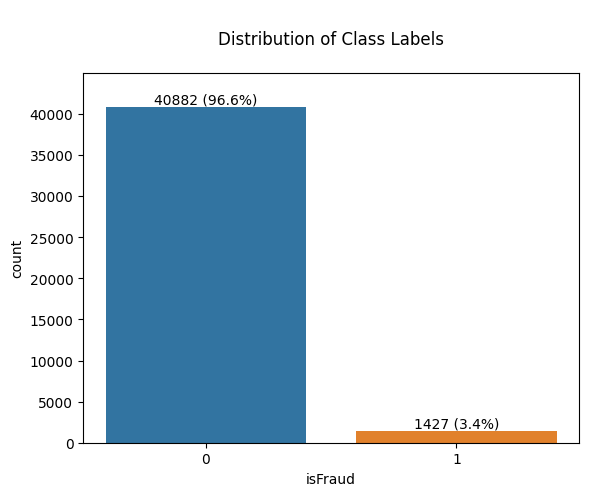

In [481]:
ax = sns.countplot(x='isFraud', data = train_data)

plt.title("\nDistribution of Class Labels\n")

plt.margins(0.05, 0.1)

for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('{} ({:.1f}%)'.format(int(y),100.*y/len(train_data)), (x.mean(), y),
          ha='center', va='bottom')

plt.show()

In [482]:
# We have the followig Categorical Features

print(catf)

['TransactionID', 'TransactionDT', 'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5', 'card6', 'P_emaildomain', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219', 'V220', 'V221', 'V222', 'V223

> __ProductCD__ Bivariate analysis

In [483]:
train_data[['ProductCD']].describe()

ProductCD
count      42309
unique         4
top            H
freq       15731

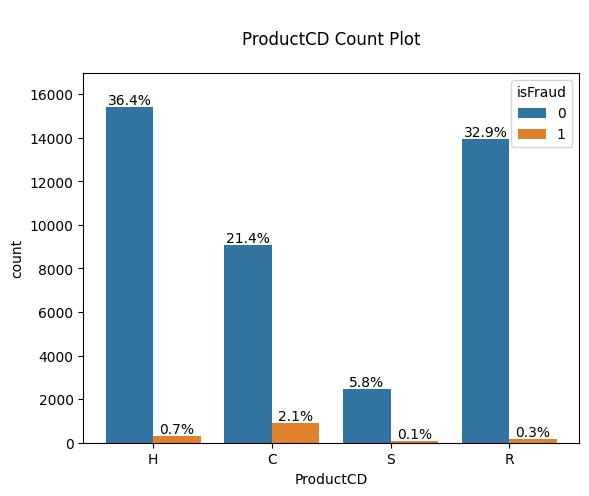

In [484]:
ax = sns.countplot(x='ProductCD', hue='isFraud', data = train_data)

plt.margins(0.05, 0.1)

for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('{:.1f}%'.format(100.*y/len(train_data)), (x.mean(), y),
          ha='center', va='bottom')

plt.title('\nProductCD Count Plot\n')
plt.show()

>__card1-card6__

In [485]:
card_features = ['card'+str(i) for i in range(1,7) if "card"+str(i) in catf]

In [486]:
for f in card_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    if(train_data[f].dtype != object):
        len_unique_cat = len(np.unique(train_data[f]))
        print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ********** card1 ********** 

count    42309.000000
mean      9816.007776
std       5032.432911
min       1004.000000
25%       5812.000000
50%       9633.000000
75%      14694.000000
max      18388.000000
Name: card1, dtype: float64

card1 feature has 5051 unique categories


 ********** card2 ********** 

count     42309.0
unique      462.0
top         583.0
freq       4793.0
Name: card2, dtype: float64

 ********** card3 ********** 

count     42309.0
unique       70.0
top         150.0
freq      32454.0
Name: card3, dtype: float64

 ********** card4 ********** 

count     42309
unique        5
top        visa
freq      26603
Name: card4, dtype: object

 ********** card5 ********** 

count     42309.0
unique       80.0
top         226.0
freq      19433.0
Name: card5, dtype: float64

 ********** card6 ********** 

count      42309
unique         4
top       credit
freq       24759
Name: card6, dtype: object


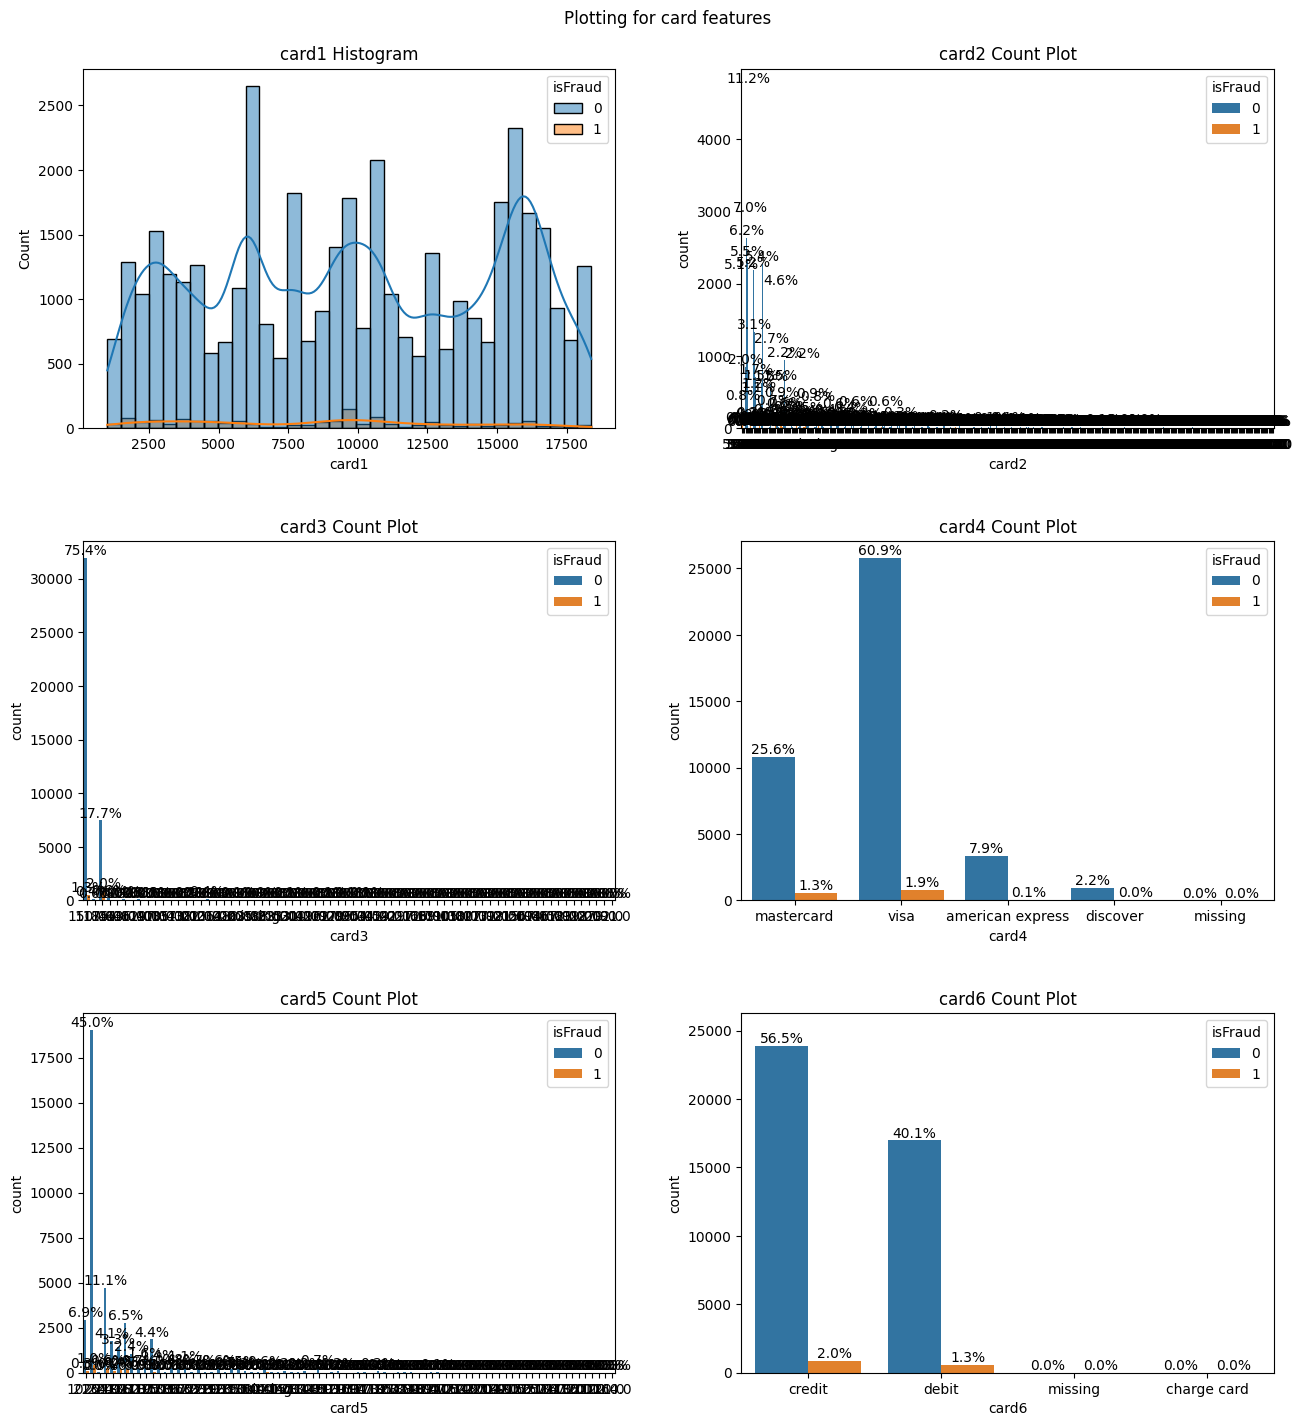

In [487]:
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

fig.tight_layout(pad=6.0)
fig.suptitle('Plotting for card features')
idx = 0

plt.margins(0.05, 0.1)

for i in range(3):
    for j in range(2):

        if(idx==len(card_features)):
            break

        f = card_features[idx]
        idx+=1

        if(train_data[f].dtype == object):
            sns.countplot(x=f,hue='isFraud', data=train_data, ax=axes[i,j])
            axes[i,j].set_title(f+" Count Plot")

            for p in axes[i,j].patches:
              x=p.get_bbox().get_points()[:,0]
              y=p.get_bbox().get_points()[1,1]
              axes[i,j].annotate('{:.1f}%'.format(100.*y/len(train_data)), (x.mean(), y),
                      ha='center', va='bottom')


        else:
            sns.histplot(x=f,hue='isFraud', data=train_data, ax=axes[i,j], kde=True)
            axes[i,j].set_title(f+" Histogram")

> __P_emaildomain and R_emaildomain__

In [488]:
domain_features = ['P_emaildomain']

In [489]:
for f in domain_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    if(train_data[f].dtype != object):
        len_unique_cat = len(np.unique(train_data[f]))
        print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ********** P_emaildomain ********** 

count         42309
unique           60
top       gmail.com
freq          15244
Name: P_emaildomain, dtype: object


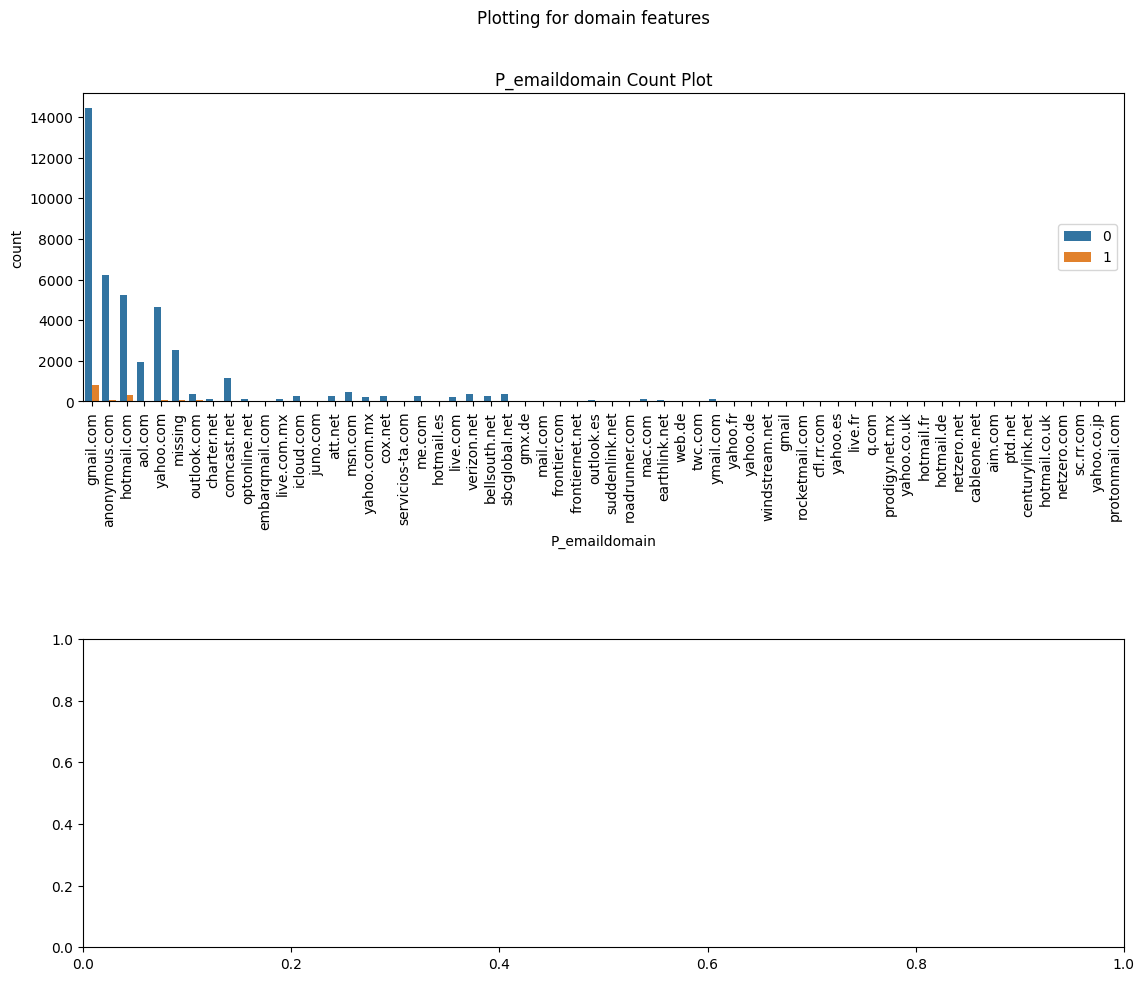

In [490]:
fig, axes = plt.subplots(2, 1, figsize=(15, 13))

fig.tight_layout(pad=15.0)
fig.suptitle('Plotting for domain features', y=0.9)
idx = 0

for i in range(2):

        if(idx==len(domain_features)):
            break

        f = domain_features[idx]
        idx+=1

        sns.countplot(x=f,hue='isFraud', data=train_data, ax=axes[i])

        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='center')
        axes[i].legend(loc=7)
        axes[i].set_title(f+" Count Plot")

> __DeviceType__

In [491]:
train_data[['DeviceType']].describe()

DeviceType
count       42309
unique          3
top       desktop
freq        28172

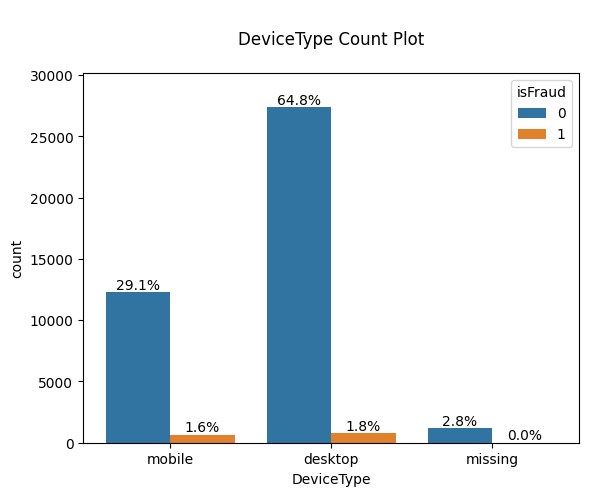

In [492]:
ax = sns.countplot(x='DeviceType', hue='isFraud', data = train_data)

plt.margins(0.05, 0.1)

for p in ax.patches:
              x=p.get_bbox().get_points()[:,0]
              y=p.get_bbox().get_points()[1,1]
              ax.annotate('{:.1f}%'.format(100.*y/len(train_data)), (x.mean(), y),
                      ha='center', va='bottom')

plt.title('\nDeviceType Count Plot\n')
plt.show()

> __id_12-id_38__

In [493]:
id_features = ["id_"+str(i) for i in range(12, 39) if "id_"+str(i) in catf]

In [494]:
for f in id_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    if(train_data[f].dtype != object):
        len_unique_cat = len(np.unique(train_data[f]))
        print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ********** id_12 ********** 

count        42309
unique           2
top       NotFound
freq         36686
Name: id_12, dtype: object

 ********** id_15 ********** 

count     42309
unique        4
top       Found
freq      19712
Name: id_15, dtype: object

 ********** id_16 ********** 

count        42309
unique           3
top       NotFound
freq         20015
Name: id_16, dtype: object

 ********** id_17 ********** 

count     42309.0
unique       74.0
top         166.0
freq      30969.0
Name: id_17, dtype: float64

 ********** id_19 ********** 

count     42309.0
unique      447.0
top         410.0
freq       4582.0
Name: id_19, dtype: float64

 ********** id_20 ********** 

count     42309.0
unique      235.0
top         507.0
freq       4638.0
Name: id_20, dtype: float64

 ********** id_28 ********** 

count     42309
unique        3
top       Found
freq      22856
Name: id_28, dtype: object

 ********** id_29 ********** 

count     42309
unique        3
top       Found
freq    

In [495]:
fig, axes = plt.subplots(27, figsize=(35, 200))

fig.tight_layout(pad=18.0)
fig.suptitle('Plotting for id features')
idx = 0

for i in range(27):

        if(idx==len(id_features)):
            break

        f = id_features[idx]
        idx+=1

        if(train_data[f].dtype == object):
            sns.countplot(x=f,hue='isFraud', data=train_data, ax=axes[i])
            axes[i].set_title(f+" Count Plot")

            if(len(train_data[f].unique())>10):
                axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90, ha='center')

        else:
            sns.histplot(x=f,hue='isFraud', data=train_data, ax=axes[i], kde=True)
            axes[i].set_title(f+" Histogram")

- #### Quantitative Features
<br>

In [496]:
# We have the followig Quantitative Features

print(numf)

['TransactionAmt']


>__TransactionDT__

In [497]:
train_data[['TransactionDT']].describe().astype(int)

TransactionDT
count          42309
mean         1295546
std           539065
min            86506
25%           872100
50%          1381345
75%          1778501
max          2048232

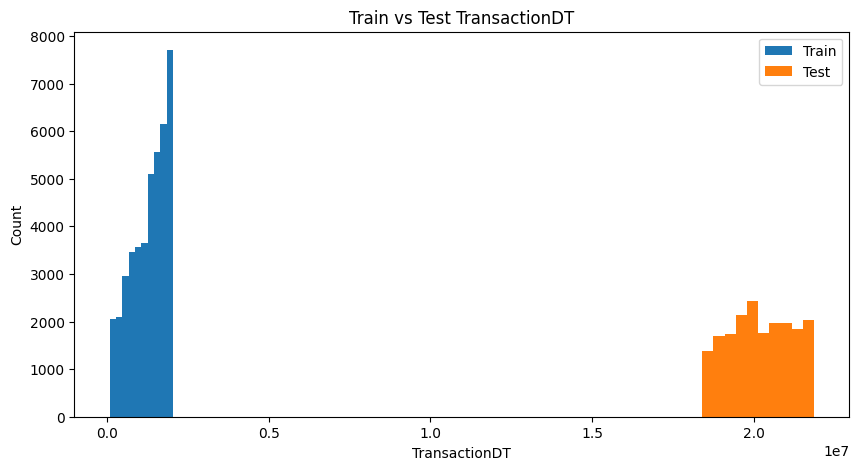

In [498]:
plt.figure(figsize=(10,5))
plt.hist(x = 'TransactionDT', data = train_data, label='Train')
plt.hist(x = 'TransactionDT', data = test_data, label='Test')
plt.title("Train vs Test TransactionDT")
plt.xlabel("TransactionDT")
plt.ylabel("Count")
plt.legend()
plt.show()

>__TransactionAmt__

In [499]:
train_data[['TransactionAmt']].describe()

TransactionAmt
count    42309.000000
mean       103.752224
std        122.832876
min          0.292000
25%         37.588000
50%         75.000000
75%        104.889000
max       1550.000000

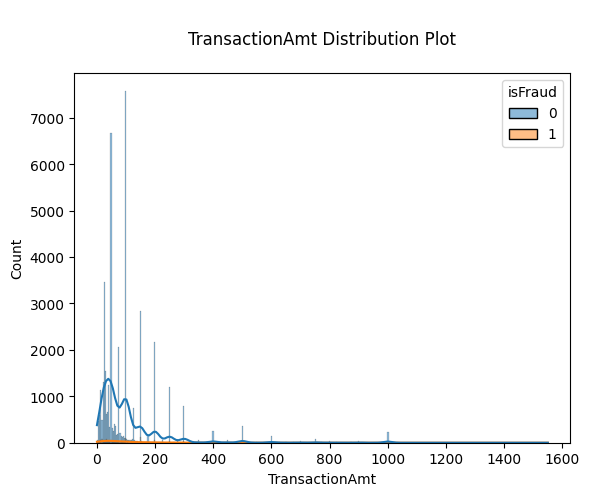

In [500]:
sns.histplot(x='TransactionAmt', hue='isFraud', data=train_data, kde=True)
plt.title('\nTransactionAmt Distribution Plot\n')
plt.show()

Observation: this num featrure seems to follow Poisson Dist.

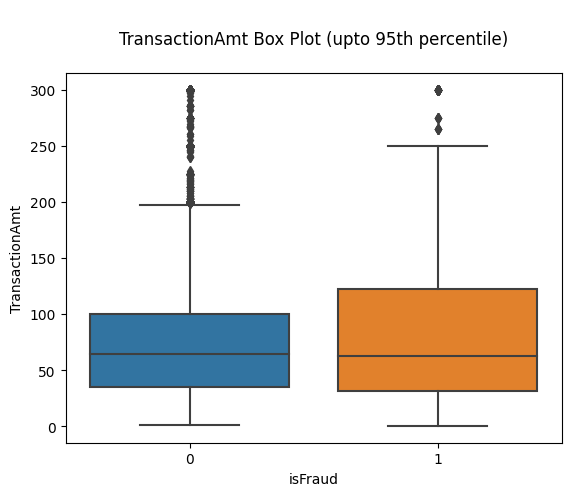

In [501]:
sns.boxplot(y='TransactionAmt', x='isFraud', data=train_data[train_data['TransactionAmt']<=np.percentile(train_data['TransactionAmt'], 95)])
plt.title('\nTransactionAmt Box Plot (upto 95th percentile)\n')
plt.show()

>__id_01-id_11__

In [502]:
id_num_features = ['id_01']

In [503]:
for f in id_num_features:
    print('\n',"*"*10,f,"*"*10,'\n')
    print(train_data[f].describe())
    len_unique_cat = len(np.unique(train_data[f]))
    print("\n{} feature has {} unique categories\n".format(f, len_unique_cat))


 ********** id_01 ********** 

count    42309.000000
mean        -8.346167
std         13.359087
min       -100.000000
25%         -5.000000
50%         -5.000000
75%         -5.000000
max          0.000000
Name: id_01, dtype: float64

id_01 feature has 53 unique categories



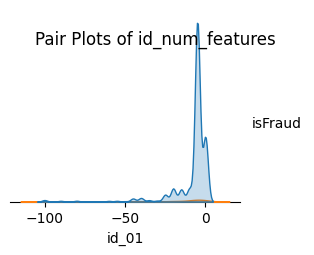

In [504]:
sns.pairplot(vars = id_num_features, hue='isFraud', data = train_data, corner=True)
plt.suptitle("\nPair Plots of id_num_features\n")
plt.show()

#### - Bivariate Analysis
<br>

>__ProductCD vs TransactionAmt__

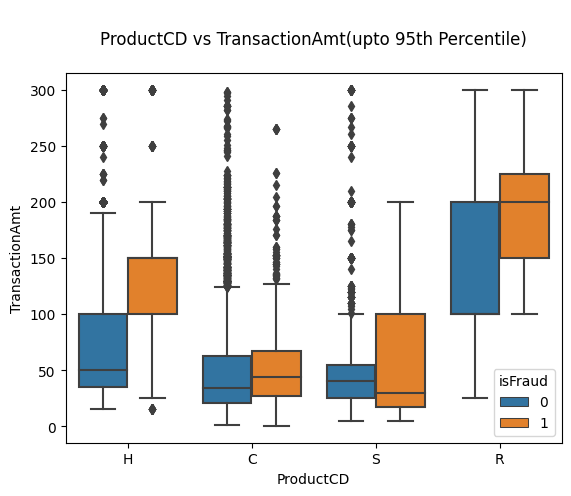

In [505]:
sns.boxplot(x='ProductCD', y='TransactionAmt', data=train_data[train_data['TransactionAmt']<=np.percentile(train_data['TransactionAmt'], 95)], hue='isFraud')
plt.title('\nProductCD vs TransactionAmt(upto 95th Percentile)\n')
plt.show()

>__P_emaildomain vs TransactionAmt__

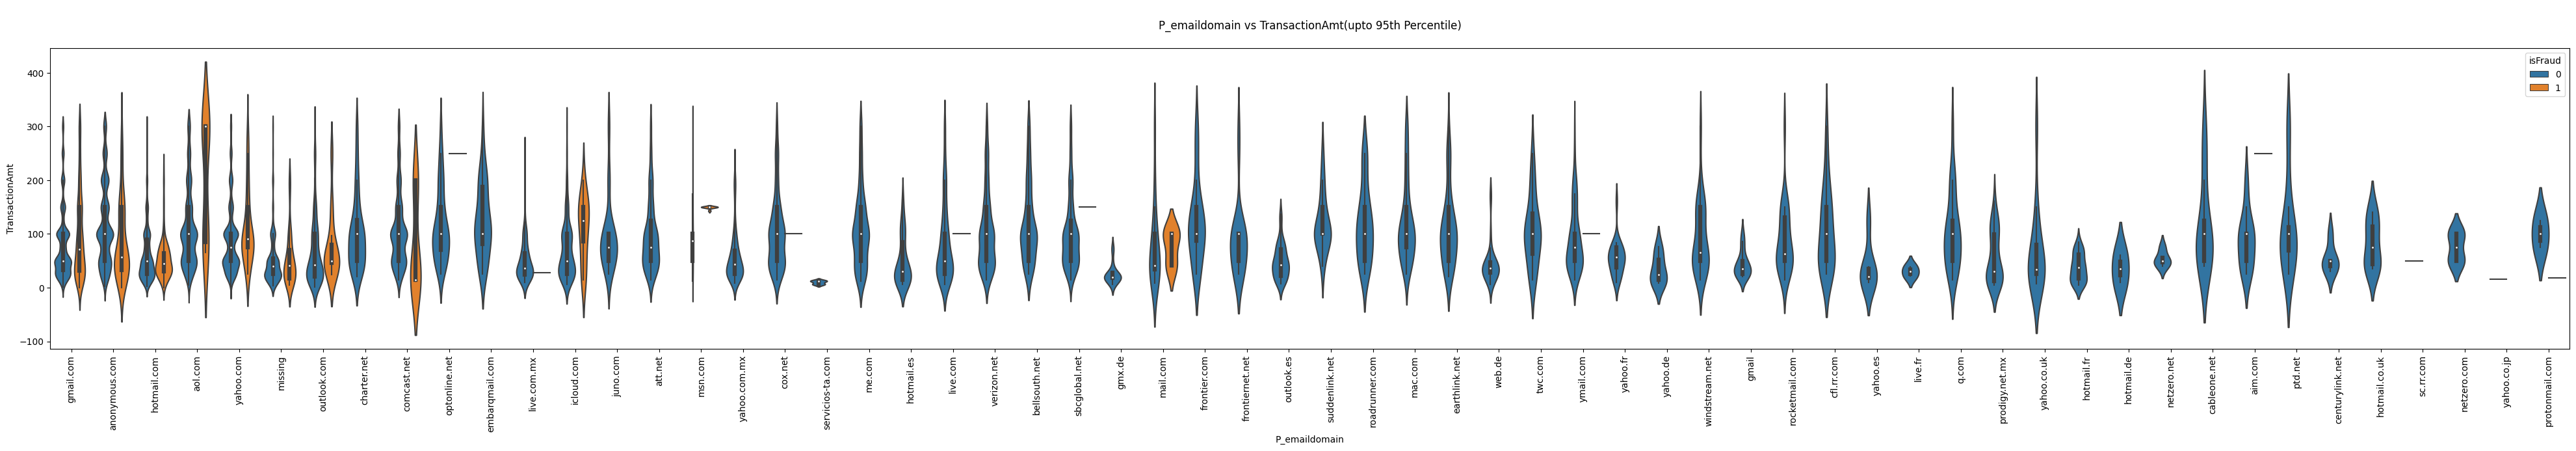

In [506]:
plt.figure(figsize=(50,6))
ax = sns.violinplot(x='P_emaildomain', y='TransactionAmt', data=train_data[train_data['TransactionAmt']<=np.percentile(train_data['TransactionAmt'], 95)], hue='isFraud', split=False)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='center')
plt.title('\nP_emaildomain vs TransactionAmt(upto 95th Percentile)\n')
plt.show()

> __TransactionDT vs TransctionAmt__

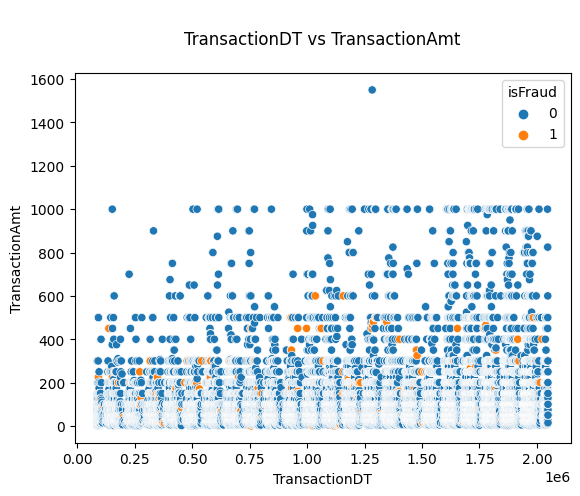

In [507]:
sns.scatterplot(x='TransactionDT', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nTransactionDT vs TransactionAmt\n")
plt.show()

In [508]:
# Removing Outlier from the TransactionAmt

train_data = train_data[train_data['TransactionAmt']<30000]

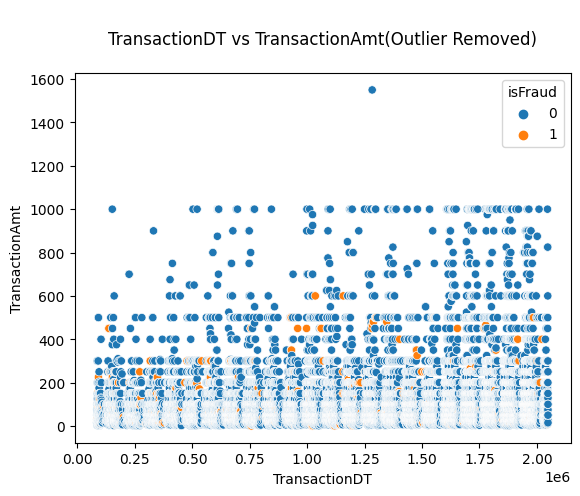

In [509]:
sns.scatterplot(x='TransactionDT', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nTransactionDT vs TransactionAmt(Outlier Removed)\n")
plt.show()

> __card1-card6 vs TransactionAmt__

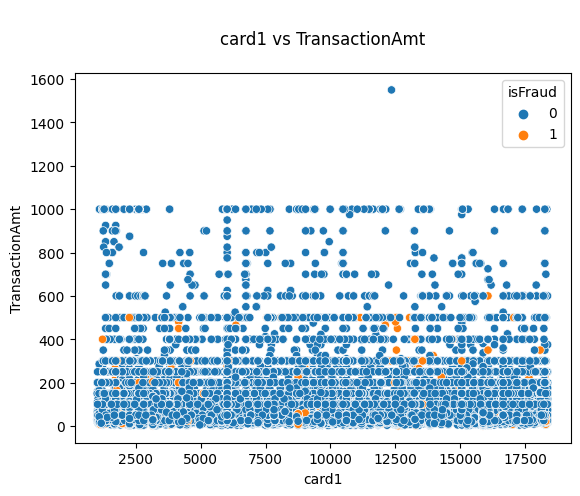

In [510]:
sns.scatterplot(x='card1', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\ncard1 vs TransactionAmt\n")
plt.show()

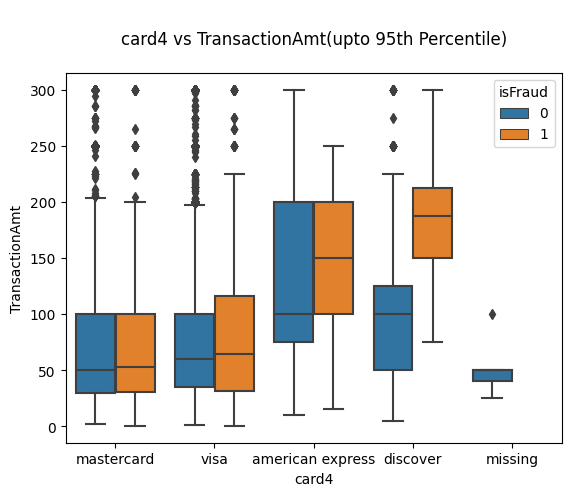

In [511]:
sns.boxplot(x=train_data['card4'], y='TransactionAmt', hue='isFraud', data=train_data[train_data['TransactionAmt']<=np.percentile(train_data['TransactionAmt'], 95)])
plt.title('\ncard4 vs TransactionAmt(upto 95th Percentile)\n')
plt.show()

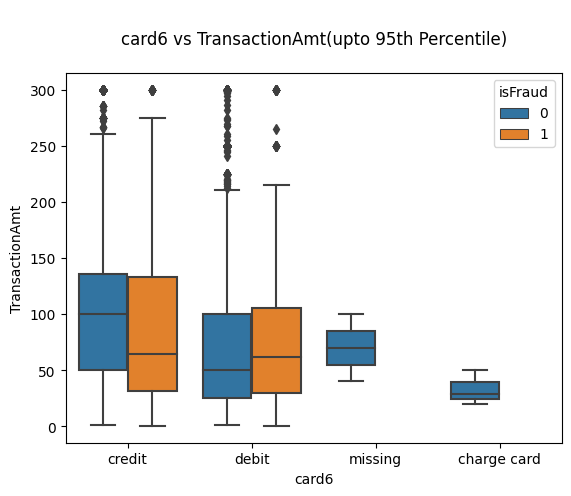

In [512]:
sns.boxplot(x=train_data['card6'], y='TransactionAmt', hue='isFraud', data=train_data[train_data['TransactionAmt']<=np.percentile(train_data['TransactionAmt'], 95)])
plt.title('\ncard6 vs TransactionAmt(upto 95th Percentile)\n')
plt.show()

> __C1-C14 vs TransactionAmt__

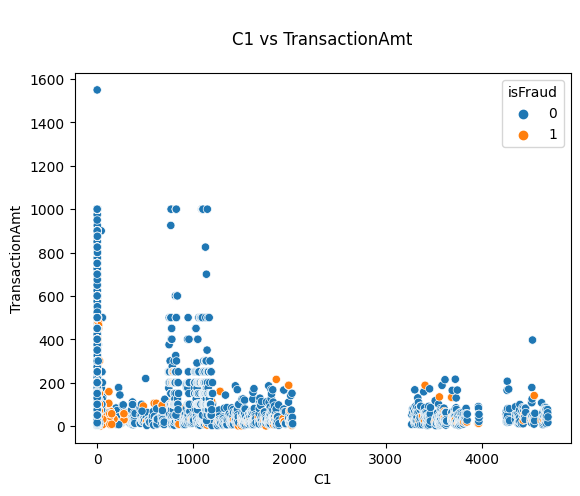

In [513]:
sns.scatterplot(x='C1', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC1 vs TransactionAmt\n")
plt.show()

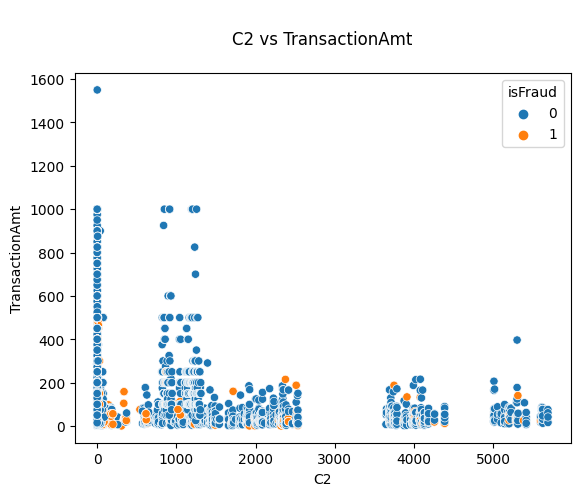

In [514]:
sns.scatterplot(x='C2', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC2 vs TransactionAmt\n")
plt.show()

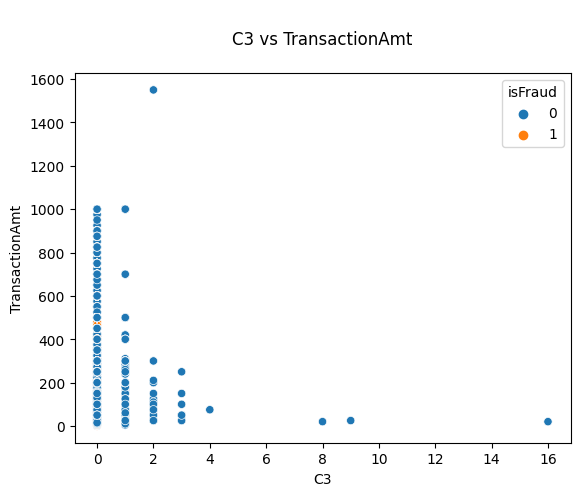

In [515]:
sns.scatterplot(x='C3', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC3 vs TransactionAmt\n")
plt.show()

In [516]:
sns.scatterplot(x='C4', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC4 vs TransactionAmt\n")
plt.show()

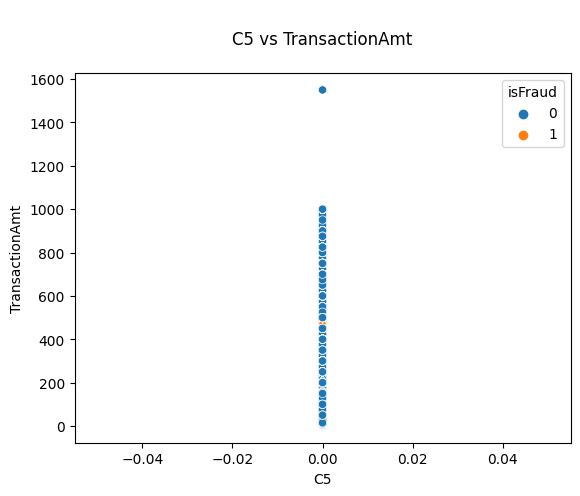

In [517]:
sns.scatterplot(x='C5', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC5 vs TransactionAmt\n")
plt.show()

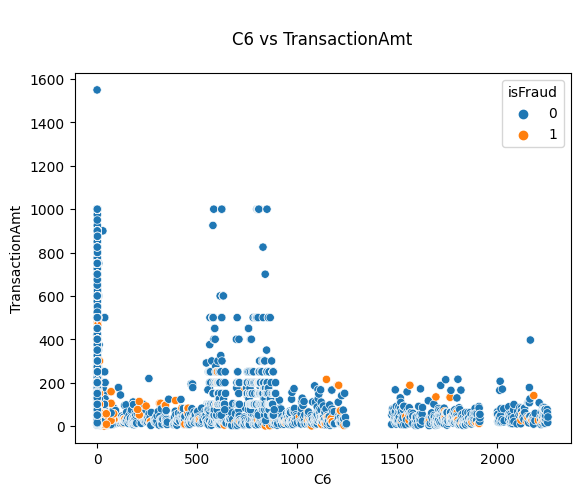

In [518]:
sns.scatterplot(x='C6', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC6 vs TransactionAmt\n")
plt.show()

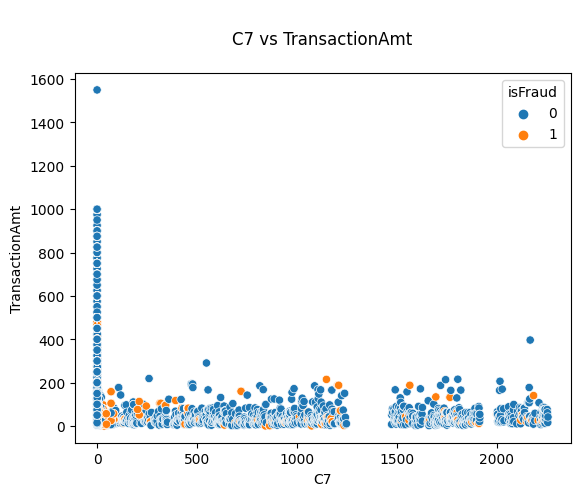

In [519]:
sns.scatterplot(x='C7', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC7 vs TransactionAmt\n")
plt.show()

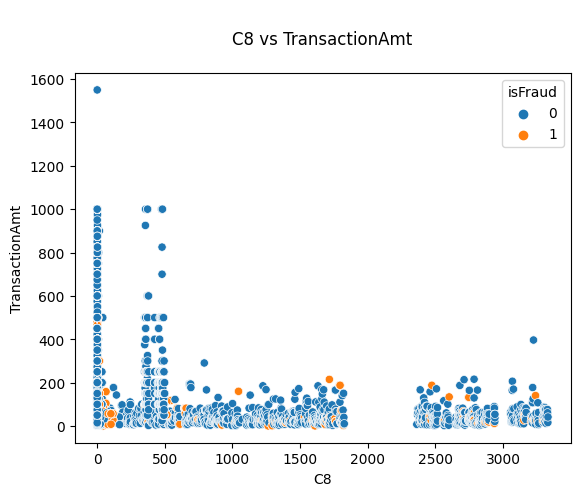

In [520]:
sns.scatterplot(x='C8', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC8 vs TransactionAmt\n")
plt.show()

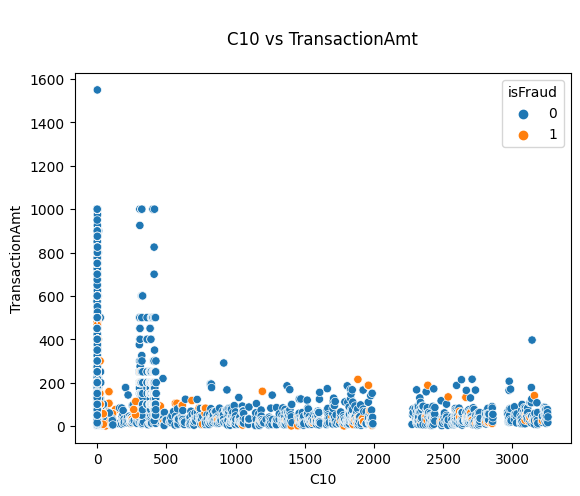

In [521]:
sns.scatterplot(x='C10', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC10 vs TransactionAmt\n")
plt.show()

In [522]:
sns.scatterplot(x='C11', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC11 vs TransactionAmt\n")
plt.show()

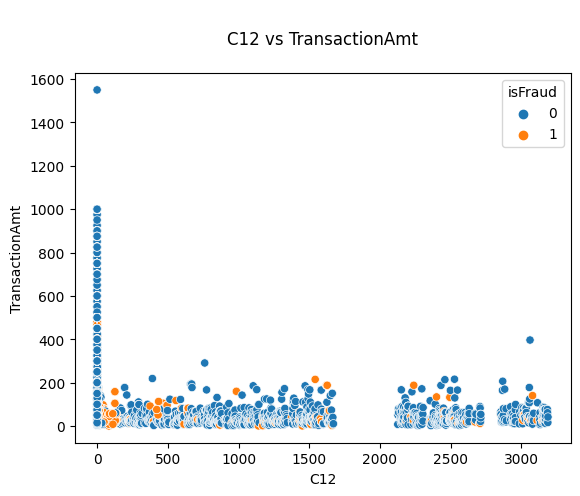

In [523]:
sns.scatterplot(x='C12', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC12 vs TransactionAmt\n")
plt.show()

In [524]:
sns.scatterplot(x='C13', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC13 vs TransactionAmt\n")
plt.show()

In [525]:
sns.scatterplot(x='C14', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nC14 vs TransactionAmt\n")
plt.show()

> __D1-D15 vs TransactionAmt__

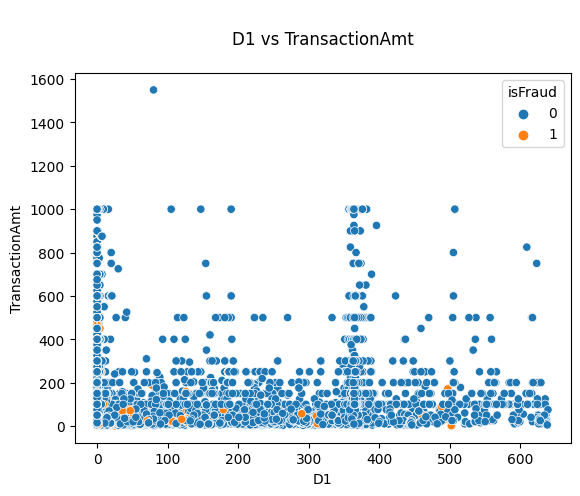

In [526]:
sns.scatterplot(x='D1', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD1 vs TransactionAmt\n")
plt.show()

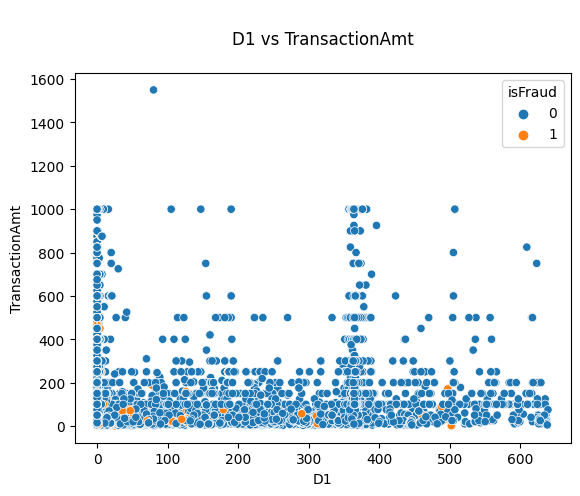

In [527]:
sns.scatterplot(x='D1', y='TransactionAmt', hue='isFraud', data = train_data)
plt.title("\nD1 vs TransactionAmt\n")
plt.show()

V feature selection

In [528]:
import pandas as pd
column_names = train_data.columns
missing_dict = {}
for col in column_names:
    count = (train_data[col].astype(str).str.lower() == 'missing').sum()
    try:
        missing_dict[count].append(col)
    except KeyError:
        missing_dict[count] = [col]
for count, columns in missing_dict.items():
    missing_percentage = (count / train_data.shape[0]) * 100
    print(f'{"####" * 4}')
    print(f'Missing count: {count}, Missing percentage: {missing_percentage:.2f}%')
    print(f'Columns: {columns}')


################
Missing count: 0, Missing percentage: 0.00%
Columns: ['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14', 'D1', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V281', 'V282', 'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315', 'id_01', 'id_12']
################
Missing count: 153, Missing percentage: 0.36%
Columns: ['card2']
################
Missing count: 1, Missing percentage: 0.00%
Columns: ['card3', 'V279', 'V280', 'V284', 'V285', 'V286', 'V287', 'V290', 'V291', 'V292', 'V293', 'V294', 'V295', 'V297', 'V298', 'V299', 'V302', 'V303', 'V304', 'V30

In [529]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

selected_columns = ['V167', 'V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182',
                    'V183', 'V186', 'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V202',
                    'V203', 'V204', 'V205', 'V206', 'V207', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216']

subset_df = train_data[selected_columns]

subset_df.sample(5)

fixed_number = -999
subset_df = subset_df.apply(pd.to_numeric, errors='coerce').fillna(fixed_number)

correlation_matrix = subset_df.corr(numeric_only=False)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

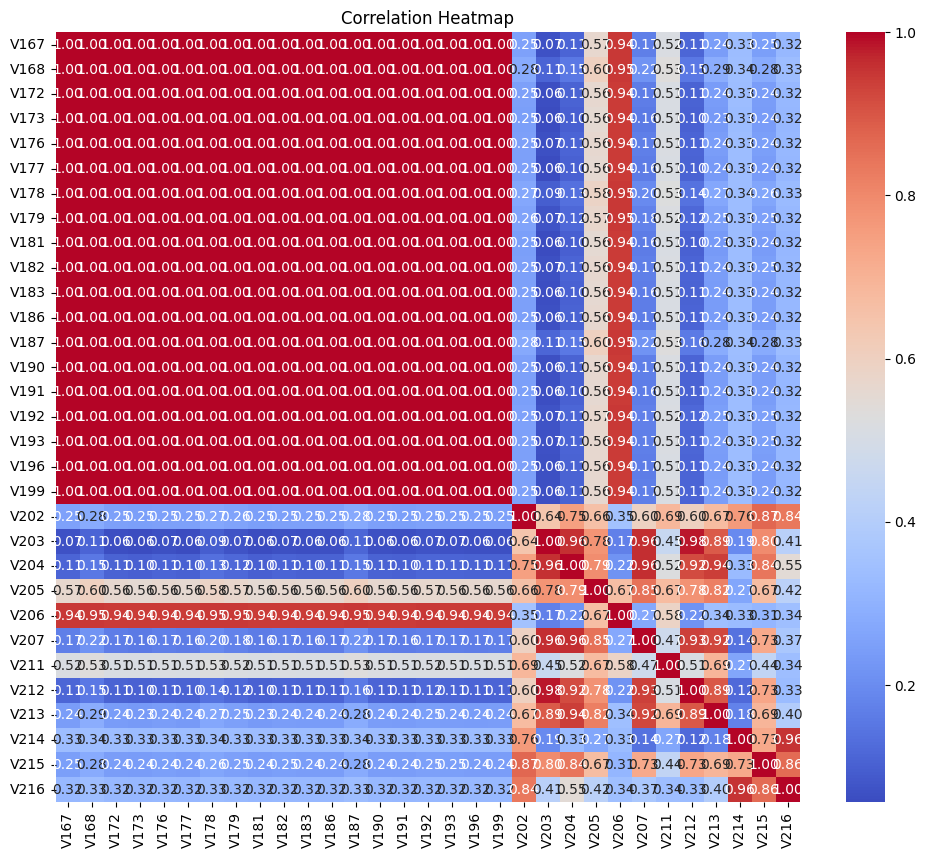

Group V167: ['V167', 'V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V183', 'V186', 'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V206', 'V167']
Group V168: ['V167', 'V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V183', 'V186', 'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V206', 'V168']
Group V172: ['V167', 'V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V183', 'V186', 'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V206', 'V172']
Group V173: ['V167', 'V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V183', 'V186', 'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V206', 'V173']
Group V176: ['V167', 'V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V183', 'V186', 'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V206', 'V176']
Group V177: ['V167', 'V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V

In [530]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
selected_columns1 = ['V167', 'V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182',
                    'V183', 'V186', 'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V202',
                    'V203', 'V204', 'V205', 'V206', 'V207', 'V211', 'V212', 'V213', 'V214', 'V215', 'V216']
subset_df = train_data[selected_columns1]

subset_df.sample(5)

fixed_number = -999
subset_df = subset_df.apply(pd.to_numeric, errors='coerce').fillna(fixed_number)

correlation_matrix = subset_df.corr(numeric_only=False)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

correlation_threshold = 0.75
correlation_groups = {}

for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[correlation_matrix[col] > correlation_threshold].tolist()
    if correlated_cols:
        correlated_cols.append(col)  # Include the column itself in the group
        correlation_groups[col] = correlated_cols

for group, columns in correlation_groups.items():
    print(f'Group {group}: {columns}')


In [531]:
common_columns1 = ['V167', 'V202', 'V203', 'V211']

columns_to_drop1 = [v for v in selected_columns1 if v not in common_columns1]

print(columns_to_drop1)

['V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V183', 'V186', 'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V204', 'V205', 'V206', 'V207', 'V212', 'V213', 'V214', 'V215', 'V216']


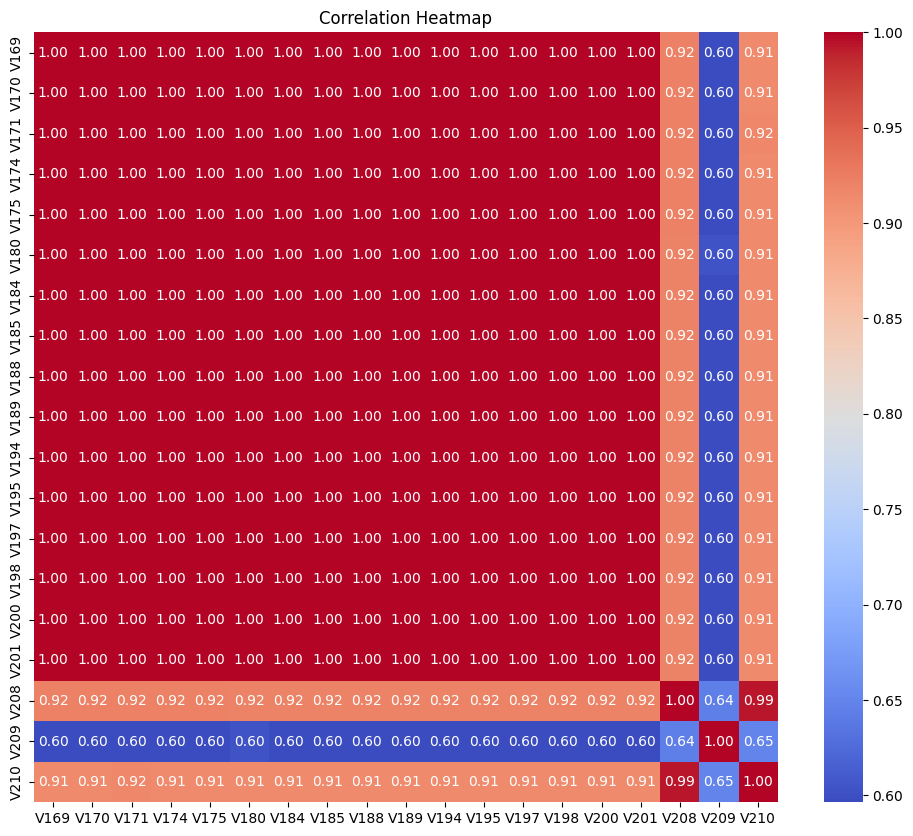

Group V169: ['V169', 'V170', 'V171', 'V174', 'V175', 'V180', 'V184', 'V185', 'V188', 'V189', 'V194', 'V195', 'V197', 'V198', 'V200', 'V201', 'V208', 'V210', 'V169']
Group V170: ['V169', 'V170', 'V171', 'V174', 'V175', 'V180', 'V184', 'V185', 'V188', 'V189', 'V194', 'V195', 'V197', 'V198', 'V200', 'V201', 'V208', 'V210', 'V170']
Group V171: ['V169', 'V170', 'V171', 'V174', 'V175', 'V180', 'V184', 'V185', 'V188', 'V189', 'V194', 'V195', 'V197', 'V198', 'V200', 'V201', 'V208', 'V210', 'V171']
Group V174: ['V169', 'V170', 'V171', 'V174', 'V175', 'V180', 'V184', 'V185', 'V188', 'V189', 'V194', 'V195', 'V197', 'V198', 'V200', 'V201', 'V208', 'V210', 'V174']
Group V175: ['V169', 'V170', 'V171', 'V174', 'V175', 'V180', 'V184', 'V185', 'V188', 'V189', 'V194', 'V195', 'V197', 'V198', 'V200', 'V201', 'V208', 'V210', 'V175']
Group V180: ['V169', 'V170', 'V171', 'V174', 'V175', 'V180', 'V184', 'V185', 'V188', 'V189', 'V194', 'V195', 'V197', 'V198', 'V200', 'V201', 'V208', 'V210', 'V180']
Group V184

In [532]:
selected_columns2 = ['V169', 'V170', 'V171', 'V174', 'V175', 'V180', 'V184', 'V185', 'V188', 'V189', 'V194', 'V195', 'V197', 'V198', 'V200', 'V201', 'V208', 'V209', 'V210']
subset_df = train_data[selected_columns2]
subset_df.sample(5)

fixed_number = -999
subset_df = subset_df.apply(pd.to_numeric, errors='coerce').fillna(fixed_number)

correlation_matrix = subset_df.corr(numeric_only=False)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

correlation_threshold = 0.75
correlation_groups = {}

for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[correlation_matrix[col] > correlation_threshold].tolist()
    if correlated_cols:
        correlated_cols.append(col)
        correlation_groups[col] = correlated_cols

for group, columns in correlation_groups.items():
    print(f'Group {group}: {columns}')

In [533]:
common_columns2 = ['V169', 'V209']

columns_to_drop2 = [v for v in selected_columns2 if v not in common_columns2]

print(columns_to_drop2)

['V170', 'V171', 'V174', 'V175', 'V180', 'V184', 'V185', 'V188', 'V189', 'V194', 'V195', 'V197', 'V198', 'V200', 'V201', 'V208', 'V210']


In [534]:
selected_columns3 = ['V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241', 'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253', 'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V263', 'V264', 'V265', 'V266', 'V267', 'V268', 'V269', 'V273', 'V274', 'V275', 'V276', 'V277', 'V278']
subset_df = train_data[selected_columns3]

subset_df.sample(5)

fixed_number = -999
subset_df = subset_df.apply(pd.to_numeric, errors='coerce').fillna(fixed_number)
correlation_matrix = subset_df.corr(numeric_only=False)
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
correlation_threshold = 0.75
correlation_groups = {}

for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[correlation_matrix[col] > correlation_threshold].tolist()
    if correlated_cols:
        correlated_cols.append(col)  # Include the column itself in the group
        correlation_groups[col] = correlated_cols

for group, columns in correlation_groups.items():
    print(f'Group {group}: {columns}')

Group V217: ['V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241', 'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253', 'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V266', 'V269', 'V217']
Group V218: ['V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241', 'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253', 'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V266', 'V269', 'V218']
Group V219: ['V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241', 'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253', 'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V266', 'V269', 'V219']
Group V223: ['V217', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229', 'V230', 'V23

In [535]:
common_columns3 = ['V217', 'V264', 'V263', 'V273']

columns_to_drop3 = [v for v in selected_columns3 if v not in common_columns3]

print(columns_to_drop3)

['V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241', 'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253', 'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V265', 'V266', 'V267', 'V268', 'V269', 'V274', 'V275', 'V276', 'V277', 'V278']


In [536]:
selected_columns4 = ['V220', 'V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256', 'V259', 'V270', 'V271', 'V272']
subset_df = train_data[selected_columns4]

subset_df.sample(5)

fixed_number = -999
subset_df = subset_df.apply(pd.to_numeric, errors='coerce').fillna(fixed_number)

correlation_matrix = subset_df.corr(numeric_only=False)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()
correlation_threshold = 0.75
correlation_groups = {}

for col in correlation_matrix.columns:
    correlated_cols = correlation_matrix.index[correlation_matrix[col] > correlation_threshold].tolist()
    if correlated_cols:
        correlated_cols.append(col)  # Include the column itself in the group
        correlation_groups[col] = correlated_cols
for group, columns in correlation_groups.items():
    print(f'Group {group}: {columns}')


Group V220: ['V220', 'V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256', 'V259', 'V270', 'V271', 'V272', 'V220']
Group V221: ['V220', 'V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256', 'V259', 'V270', 'V271', 'V272', 'V221']
Group V222: ['V220', 'V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256', 'V259', 'V270', 'V271', 'V272', 'V222']
Group V227: ['V220', 'V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256', 'V259', 'V270', 'V271', 'V272', 'V227']
Group V234: ['V220', 'V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256', 'V259', 'V270', 'V271', 'V272', 'V234']
Group V238: ['V220', 'V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256', 'V259', 'V270', 'V271', 'V272', 'V238']
Group V239: ['V220', 'V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256

In [537]:
common_columns4 = ['V220']

columns_to_drop4 = [v for v in selected_columns4 if v not in common_columns4]

print(columns_to_drop4)

['V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256', 'V259', 'V270', 'V271', 'V272']


In [538]:
finalcoltodrop = columns_to_drop1 + columns_to_drop2 + columns_to_drop3 + columns_to_drop4

print(finalcoltodrop)

print(len(finalcoltodrop))

['V168', 'V172', 'V173', 'V176', 'V177', 'V178', 'V179', 'V181', 'V182', 'V183', 'V186', 'V187', 'V190', 'V191', 'V192', 'V193', 'V196', 'V199', 'V204', 'V205', 'V206', 'V207', 'V212', 'V213', 'V214', 'V215', 'V216', 'V170', 'V171', 'V174', 'V175', 'V180', 'V184', 'V185', 'V188', 'V189', 'V194', 'V195', 'V197', 'V198', 'V200', 'V201', 'V208', 'V210', 'V218', 'V219', 'V223', 'V224', 'V225', 'V226', 'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V235', 'V236', 'V237', 'V240', 'V241', 'V242', 'V243', 'V244', 'V246', 'V247', 'V248', 'V249', 'V252', 'V253', 'V254', 'V257', 'V258', 'V260', 'V261', 'V262', 'V265', 'V266', 'V267', 'V268', 'V269', 'V274', 'V275', 'V276', 'V277', 'V278', 'V221', 'V222', 'V227', 'V234', 'V238', 'V239', 'V245', 'V250', 'V251', 'V255', 'V256', 'V259', 'V270', 'V271', 'V272']
101


In [539]:
train_data10 = train_data.drop(columns=finalcoltodrop)

In [540]:
train_data.shape

(42309, 243)

In [541]:
train_data10.shape

(42309, 142)

In [542]:
train_data10.sample()

TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
26104        3058433        0        1610426            50.0         H  11207   

       card2  card3 card4  card5  card6 P_emaildomain   C1   C2   C3   C4  \
26104  361.0  150.0  visa  226.0  debit     yahoo.com  1.0  1.0  0.0  1.0   

        C5   C6   C7   C8  C10  C11  C12  C13  C14   D1  V95  V96  V97  V98  \
26104  0.0  1.0  0.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0   

       V99  V100  V101  V102  V103  V104  V105  V106  V107  V108  V109  V110  \
26104  0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   1.0   1.0   1.0   1.0   

       V111  V112  V113  V114  V115  V116  V117  V118  V119  V120  V121  V122  \
26104   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   

       V123  V124  V125  V126  V127  V128  V129  V130  V131  V132  V133  V134  \
26104   1.0   1.0   1.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   

       V135  V136  V137 V167 V169 V202 V203 V209 V211 V217 V220 V263 V264  \
26104   0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

      V273 V279 V280  V281  V282  V283 V284 V285 V286 V287  V288  V289 V290  \
26104  0.0  0.0  0.0   0.0   1.0   1.0  0.0  0.0  0.0  0.0   0.0   0.0  1.0   

      V291 V292 V293 V294 V295  V296 V297 V298 V299  V300  V301 V302 V303  \
26104  1.0  1.0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0   0.0  1.0  1.0   

      V304 V305 V306 V307 V308 V309 V310 V311 V312  V313  V314  V315 V316  \
26104  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   0.0   0.0   0.0  0.0   

      V317 V318 V319 V320 V321  id_01     id_02 id_05 id_06      id_11  \
26104  0.0  0.0  0.0  0.0  0.0   -5.0  181925.0   1.0   0.0  95.830002   

          id_12 id_15     id_16  id_17  id_19  id_20  id_28  id_29  \
26104  NotFound   New  NotFound  166.0  529.0  549.0  Found  Found   

             id_31 id_35 id_36 id_37 id_38 DeviceType  
26104  chrome 63.0     T     F     T     T    desktop

In [543]:
train_data = train_data10

#@__data preparing for ML MODELS__

In [544]:
import random
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from prettytable import PrettyTable
import sklearn
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import TimeSeriesSplit, train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings("ignore")

In [545]:
# Loading the merged train and test dataset

train_data = pd.read_pickle('merged_train.pkl')
test_data = pd.read_pickle('merged_test.pkl')

In [546]:
print("*"*45)
print("\n Train Data Shape : {} \n".format(train_data.shape))
print("\n Test Data Shape : {} \n".format(test_data.shape))
print("*"*45)

*********************************************

 Train Data Shape : (42309, 243) 


 Test Data Shape : (18949, 433) 

*********************************************


In [547]:
def label_encode(X_train, X_test, catf):

  '''
    Utility Function to Encode Categorical Features.
  '''

  for f in catf:

    X_train[f] = X_train[f].astype(str)
    X_test[f] = X_test[f].astype(str)

    le = LabelEncoder()
    le.fit(X_train[f])
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    X_train[f] = le.transform(X_train[f])

    # Manually Encoding the CV and Test Dataset so as to avoid error for any category which is not present in train set

    # All the categories which are not present in train datset are encoded as -1

    X_test[f] = [-1 if mapping.get(v, -1)==-1 else mapping[v] for v in X_test[f].values ]

  return (X_train, X_test)

In [548]:
def normalize(X_train, X_test):
    '''
        Utility Function to scale the values of the Train, CV and Test Datasets between 0 and 1.
    '''

    for f in X_train.columns:

        min_val = X_train[f].min()
        max_val = X_train[f].max()

        X_train[f] = (X_train[f]-min_val)/(max_val-min_val)
        X_test[f] = (X_test[f]-min_val)/(max_val-min_val)

    return (X_train, X_test)

In [549]:
def predict_and_save(prediction, name):

    '''
        Utility Function to save the test data predictions locally.
    '''

    df = pd.DataFrame({'TransactionID':test_ids.reshape(-1), 'isFraud':prediction.reshape(-1)})
    df = df.sort_values('TransactionID')
    df.to_csv(name, index=False)

In [550]:
X_train = train_data.drop(['isFraud', 'TransactionID'], axis=1)
y_train = train_data['isFraud']

X_test = test_data.drop(['TransactionID'], axis=1)
test_ids = test_data['TransactionID'].values

del train_data, test_data

In [551]:
print("*"*45)
print("\n Train Data Shape : {} \n".format(X_train.shape))
print("\n Test Data Shape : {} \n".format(X_test.shape))
print("*"*45)

*********************************************

 Train Data Shape : (42309, 241) 


 Test Data Shape : (18949, 432) 

*********************************************


In [552]:
# Storing Categorical and Numerical Feature Names

catf, numf = cat_num_features(X_train)
categorical_feature_indices = [X_train.columns.get_loc(f) for f in catf]

In [553]:
# Drop columns with missing values
X_train1_no_missing = X_train.dropna(axis=1) #changes made

# Display the columns in the new DataFrame
print("Columns after dropping missing values:")
print(X_train1_no_missing.columns)

print("Shape of X_train1_no_missing:", X_train1_no_missing.shape)

X_train1 = X_train1_no_missing



Columns after dropping missing values:
Index(['TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2',
       'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C10', 'C11', 'C12', 'C13', 'C14',
       'D1', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103',
       'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112',
       'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121',
       'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130',
       'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V281', 'V282',
       'V283', 'V288', 'V289', 'V296', 'V300', 'V301', 'V313', 'V314', 'V315',
       'id_01', 'id_12'],
      dtype='object')
Shape of X_train1_no_missing: (42309, 74)


In [554]:
# Check for missing values in X_train1
missing_values = X_train1.isnull().sum()

# Display columns with missing values (if any)
missing_columns = missing_values[missing_values > 0]
if not missing_columns.empty:
    print("Columns with missing values:")
    print(missing_columns)
else:
    print("No missing values in X_train1.")

No missing values in X_train1.


In [555]:
# Drop columns with missing values
X_test1_no_missing = X_test.dropna(axis=1) #changes made

# Display the columns in the new DataFrame
print("Columns after dropping missing values:")
print(X_test1_no_missing.columns)
print("Shape of X_test1_no_missing:", X_test1_no_missing.shape)

X_test1 = X_test1_no_missing

Columns after dropping missing values:
Index(['TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'C1', 'C2',
       'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9', 'C10', 'C11', 'C12', 'C13',
       'C14', 'V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102',
       'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111',
       'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120',
       'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129',
       'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'id_01',
       'id_12'],
      dtype='object')
Shape of X_test1_no_missing: (18949, 63)


In [556]:
# Check for missing values in X_train1
missing_values = X_test1.isnull().sum()

# Display columns with missing values (if any)
missing_columns = missing_values[missing_values > 0]
if not missing_columns.empty:
    print("Columns with missing values:")
    print(missing_columns)
else:
    print("No missing values in X_test1.")

No missing values in X_test1.


In [557]:
# Imputing the missing values of Categorical Columns with "missing"

X_train[catf] = X_train[catf].fillna('missing')
X_test[catf] = X_test[catf].fillna('missing')


# Label Encoding Categorical Features
X_train, X_test = label_encode(X_train, X_test, catf)

In [558]:
# Set1 (Imputed and Normalized)

X_train1 = X_train.fillna(-999)
X_test1 = X_test.fillna(-999)
X_train1, X_test1 = normalize(X_train1, X_test1)



# Set2 (Imputed)

X_train2 = X_train.fillna(-999)
X_test2 = X_test.fillna(-999)



# Set3 (Raw)

X_train3 = X_train
X_test3 = X_test

del X_train, X_test

In [559]:
train1 = X_train1
train1['isFraud'] = y_train

test1 = X_test1

del X_train1, X_test1



train2 = X_train2
train2['isFraud'] = y_train

test2 = X_test2

del X_train2, X_test2



train3 = X_train3
train3['isFraud'] = y_train

test3 = X_test3

del X_train3, y_train, X_test3

In [560]:
y_train = train1.pop('isFraud')
_ = train2.pop('isFraud')
_ = train3.pop('isFraud')


X_train1 = train1
X_test1 = test1

X_train2 = train2
X_test2 = test2

X_train3 = train3
X_test3 = test3

del train1, train2, train3

In [561]:
print("*"*60)
print("\n Train Dataset Set1 Shape : {} \n".format(X_train1.shape))
print("\n Test Dataset Set1 Shape : {} \n".format(X_test1.shape))
print("*"*60)
print("\n Train Dataset Set1 Shape : {} \n".format(X_train1.shape))
print("\n Test Dataset Set2 Shape : {} \n".format(X_test2.shape))
print("*"*60)
print("\n Train Dataset Set1 Shape : {} \n".format(X_train1.shape))
print("\n Test Dataset Set3 Shape : {} \n".format(X_test3.shape))
print("*"*60)

************************************************************

 Train Dataset Set1 Shape : (42309, 241) 


 Test Dataset Set1 Shape : (18949, 432) 

************************************************************

 Train Dataset Set1 Shape : (42309, 241) 


 Test Dataset Set2 Shape : (18949, 432) 

************************************************************

 Train Dataset Set1 Shape : (42309, 241) 


 Test Dataset Set3 Shape : (18949, 432) 

************************************************************


__#########################    ML MODELS #############################__

#@__LOGISTIC REGRESSION__

In [562]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42309 entries, 0 to 42308
Columns: 241 entries, TransactionDT to DeviceType
dtypes: float64(241)
memory usage: 78.1 MB


SMOTE

In [563]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have one dataset 'X' for features and 'y' for labels
# Also, assuming you have X_train1, y_train

# Drop NaN values
X_train1 = X_train1.dropna(axis=1)


# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train1, y_train)

X_resampled.shape

(81764, 239)

In [564]:
X_train1 = X_train1.dropna(axis=1)
X_train1.info()
print('*'*50)
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42309 entries, 0 to 42308
Columns: 239 entries, TransactionDT to DeviceType
dtypes: float64(239)
memory usage: 77.5 MB
**************************************************
<class 'pandas.core.series.Series'>
Int64Index: 42309 entries, 0 to 42308
Series name: isFraud
Non-Null Count  Dtype
--------------  -----
42309 non-null  int64
dtypes: int64(1)
memory usage: 661.1 KB


stratified 10 fold cross validation

In [565]:

# STRATIFIES K-FOLD CROSS VALIDATION { 10-fold }

# Import Required Modules.
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

# FEATCHING FEATURES AND TARGET VARIABLES IN ARRAY FORMAT.

# Input_x_Features.
x = X_train1

# Input_ y_Target_Variable.
y = y_train


# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Create classifier object.
lr = linear_model.LogisticRegression()

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified1 = []
P1=[]
R1=[]
F1=[]
M1=[]
plt.figure(figsize=(8, 8))

for train_index, test_index in skf.split(x, y):
  x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
  y_train_fold, y_test_fold = y[train_index], y[test_index]
  lr.fit(x_train_fold, y_train_fold)
  y_prob_fold = lr.predict_proba(x_test_fold)[:, 1]

  precision, recall, thresholds = precision_recall_curve(y_test_fold, y_prob_fold)
  pr_auc = auc(recall, precision)
  plt.plot(recall, precision, label=f'Fold  (AUC = {pr_auc:.2f})')

  lst_accu_stratified1.append(lr.score(x_test_fold, y_test_fold))
  precision = precision_score(y_test_fold, lr.predict(x_test_fold))
  f1 = f1_score(y_test_fold, lr.predict(x_test_fold))
  recall = recall_score(y_test_fold, lr.predict(x_test_fold))
  mse = mean_squared_error(y_test_fold, lr.predict(x_test_fold))

  P1.append(precision)
  F1.append(f1)
  R1.append(recall)
  M1.append(mse)


# Print the output.
print('List of possible accuracy:', lst_accu_stratified1)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(lst_accu_stratified1)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu_stratified1)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu_stratified1)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified1))

print('*'*50)

# Print the output.
print('List of precision values:', P1)
print('\nMaximum precision That can be obtained from this model is:',
	max(P1))
print('\nMinimum precision:',
	min(P1))
print('\nOverall precision:',
	mean(P1))
print('\nStandard Deviation is:', stdev(P1))

print('*'*50)

# Print the output.
print('List of recall values:', R1)
print('\nMaximum recall That can be obtained from this model is:',
	max(R1))
print('\nMinimum recall:',
	min(R1))
print('\nOverall recall:',
	mean(R1))
print('\nStandard Deviation is:', stdev(R1))

print('*'*50)

# Print the output.
print('List of F1 values:', F1)
print('\nMaximum F1 That can be obtained from this model is:',
	max(F1))
print('\nMinimum F1:',
	min(F1))
print('\nOverall F1:',
	mean(F1))
print('\nStandard Deviation is:', stdev(F1))

print('*'*50)

# Print the output.
print('List of MSE values:', M1)
print('\nMaximum MSE That can be obtained from this model is:',
	max(M1))
print('\nMinimum MSE:',
	min(M1))
print('\nOverall MSE:',
	mean(M1))
print('\nStandard Deviation is:', stdev(M1))



plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves for Logistic Regression (Cross-Validation)')
plt.legend(loc='upper right')
plt.show()



List of possible accuracy: [0.9763649255495155, 0.9758922240605058, 0.9758922240605058, 0.9747104703379815, 0.9768376270385252, 0.9716379106594186, 0.974001418104467, 0.9761285748050106, 0.9754195225714961, 0.9754137115839243]

Maximum Accuracy That can be obtained from this model is: 97.68376270385252 %

Minimum Accuracy: 97.16379106594187 %

Overall Accuracy: 97.5229860877135 %

Standard Deviation is: 0.0015021886892447993
**************************************************
List of precision values: [0.875, 0.7941176470588235, 0.8088235294117647, 0.819672131147541, 0.873015873015873, 0.6666666666666666, 0.7391304347826086, 0.8, 0.8653846153846154, 0.7777777777777778]

Maximum precision That can be obtained from this model is: 0.875

Minimum precision: 0.6666666666666666

Overall precision: 0.801958867524567

Standard Deviation is: 0.06469522773125706
**************************************************
List of recall values: [0.34507042253521125, 0.38028169014084506, 0.3819444444444444,

Accuracy=(Number of True Positives+Number of True Negatives)​/Total Number of Predictions

In [566]:
X_train1 = X_train1.dropna(axis=1)
lr = LogisticRegression(n_jobs = -1, class_weight = 'balanced', random_state = 3)
#lr.fit(X_resampled, y_resampled)
lr.fit(X_train1, y_train)

LogisticRegression(class_weight='balanced', n_jobs=-1, random_state=3)

In [567]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Assuming you have a trained logistic regression model 'lr'
# and a test set 'X_train1', 'y_train'

# Get predicted probabilities for positive class
y_prob = lr.predict_proba(X_train1)[:, 1]

# Calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_train, y_prob)

# Calculate AUC score for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(5, 5))
plt.plot(recall, precision, color='darkorange', lw=2, label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Logistic Regression')
plt.legend(loc='upper right')

# Mark precision-recall points for specific thresholds
threshold_markers = [0.0, 0.1, 0.3, 0.5, 0.7, 0.8, 0.9, 1.0]  # Adjust as needed
for threshold in threshold_markers:
    idx = np.argmin(np.abs(thresholds - threshold))
    plt.scatter(recall[idx], precision[idx], marker='o', color='red')
    plt.text(recall[idx], precision[idx], f'Threshold: {threshold:.2f}', fontsize=8, verticalalignment='bottom', horizontalalignment='right')

plt.show()


#@__DECISION TREE__

stratified 10 fold cross validation

In [568]:


# STRATIFIES K-FOLD CROSS VALIDATION { 10-fold }

# Import Required Modules.
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error

# Input_x_Features.
x = X_train1

# Input_ y_Target_Variable.
y = y_train


# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Create classifier object.
dt =  DecisionTreeClassifier(random_state=3, class_weight='balanced')

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified2 = []
P2=[]
R2=[]
F2=[]
M2=[]

for train_index, test_index in skf.split(x, y):
	x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
	y_train_fold, y_test_fold = y[train_index], y[test_index]
	dt.fit(x_train_fold, y_train_fold)
	lst_accu_stratified2.append(dt.score(x_test_fold, y_test_fold))
	precision = precision_score(y_test_fold, dt.predict(x_test_fold))
	f1 = f1_score(y_test_fold, dt.predict(x_test_fold))
	recall = recall_score(y_test_fold, dt.predict(x_test_fold))
	mse = mean_squared_error(y_test_fold, dt.predict(x_test_fold))


	P2.append(precision)
	F2.append(f1)
	R2.append(recall)
	M2.append(mse)


# Print the output.
print('List of possible accuracy:', lst_accu_stratified2)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(lst_accu_stratified2)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu_stratified2)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu_stratified2)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified2))

print('*'*50)

# Print the output.
print('List of precision values:', P2)
print('\nMaximum precision That can be obtained from this model is:',
	max(P2))
print('\nMinimum precision:',
	min(P2))
print('\nOverall precision:',
	mean(P2))
print('\nStandard Deviation is:', stdev(P2))

print('*'*50)

# Print the output.
print('List of recall values:', R2)
print('\nMaximum recall That can be obtained from this model is:',
	max(R2))
print('\nMinimum recall:',
	min(R2))
print('\nOverall recall:',
	mean(R2))
print('\nStandard Deviation is:', stdev(R2))

print('*'*50)

# Print the output.
print('List of F1 values:', F2)
print('\nMaximum F1 That can be obtained from this model is:',
	max(F2))
print('\nMinimum F1:',
	min(F2))
print('\nOverall F1:',
	mean(F2))
print('\nStandard Deviation is:', stdev(F2))

print('*'*50)

# Print the output.
print('List of MSE values:', M2)
print('\nMaximum MSE That can be obtained from this model is:',
	max(M2))
print('\nMinimum MSE:',
	min(M2))
print('\nOverall MSE:',
	mean(M2))
print('\nStandard Deviation is:', stdev(M2))




List of possible accuracy: [0.970928858425904, 0.9692744032143701, 0.9711652091704089, 0.9730560151264477, 0.9714015599149137, 0.9669108957693217, 0.969510753958875, 0.9714015599149137, 0.9735287166154574, 0.9718676122931442]

Maximum Accuracy That can be obtained from this model is: 97.35287166154573 %

Minimum Accuracy: 96.69108957693217 %

Overall Accuracy: 97.09045584403756 %

Standard Deviation is: 0.0019308729594745195
**************************************************
List of precision values: [0.5693430656934306, 0.541095890410959, 0.5763888888888888, 0.6311475409836066, 0.581081081081081, 0.5033557046979866, 0.5507246376811594, 0.5753424657534246, 0.6086956521739131, 0.5666666666666667]

Maximum precision That can be obtained from this model is: 0.6311475409836066

Minimum precision: 0.5033557046979866

Overall precision: 0.5703841594031116

Standard Deviation is: 0.03509834056583332
**************************************************
List of recall values: [0.5492957746478874,

In [569]:
dt =  DecisionTreeClassifier(random_state=3, class_weight='balanced')
dtmodel = dt.fit(X_train1, y_train)

In [570]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

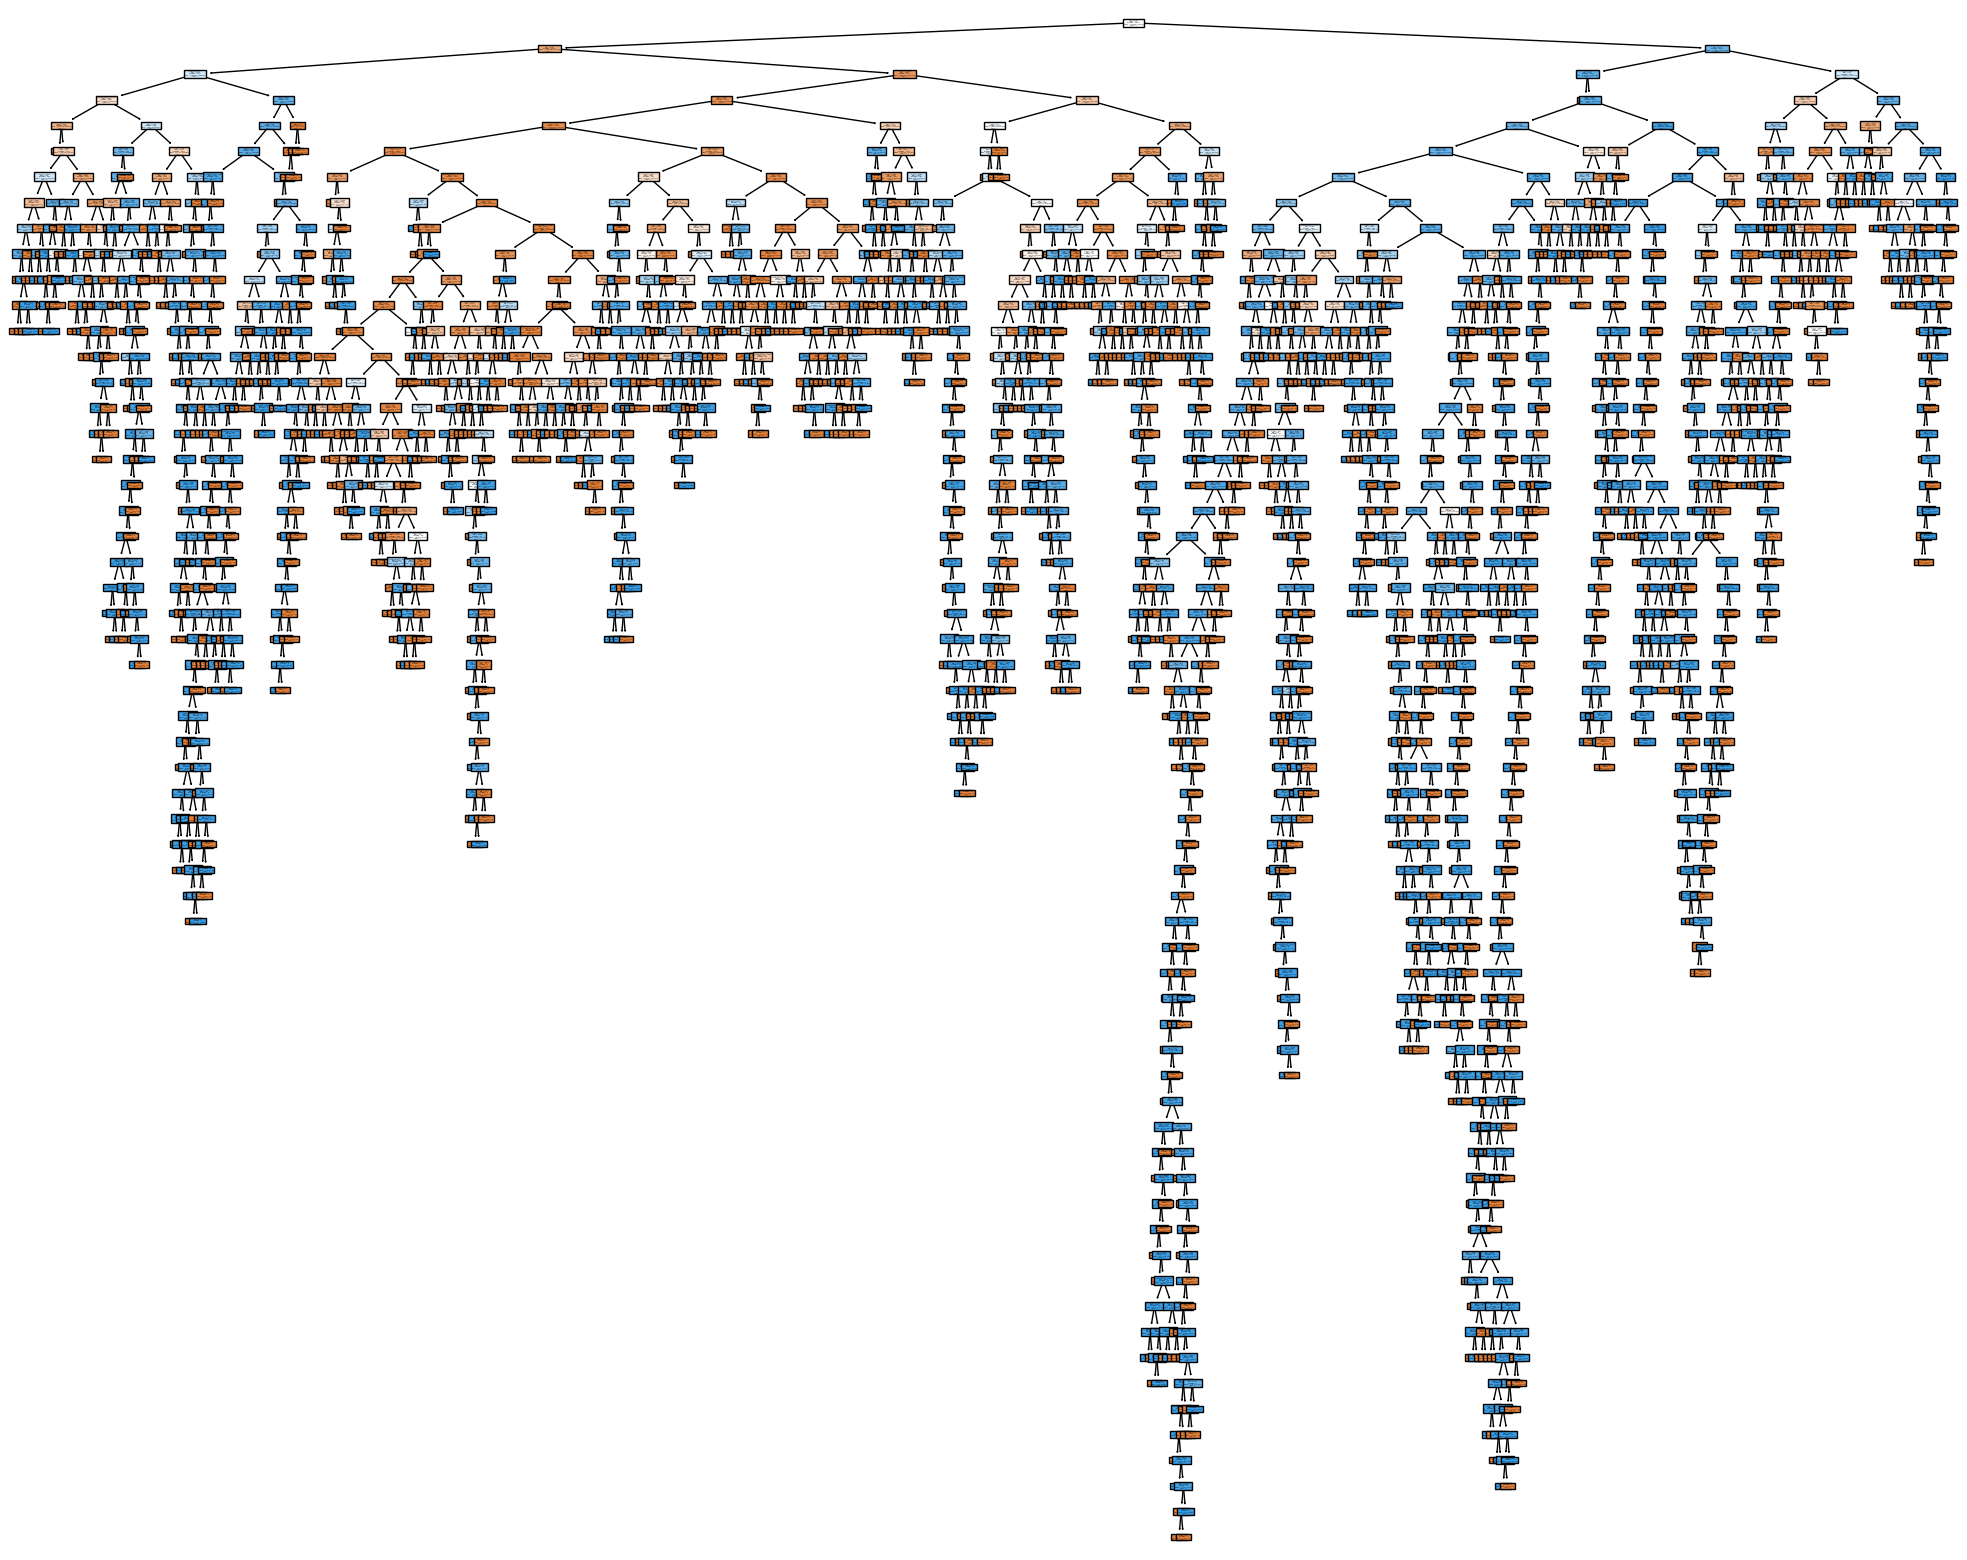

In [571]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dt,
                   feature_names=X_train2.columns,
                   class_names=y_train.unique().astype(str),
                   filled=True)

#@__RANDOM FOREST__

stratified 10 fold cross validation

In [572]:

# STRATIFIES K-FOLD CROSS VALIDATION { 10-fold }

# Import Required Modules.
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error



# Input_x_Features.
x = X_train1

# Input_ y_Target_Variable.
y = y_train


# Feature Scaling for input features.
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)

# Create classifier object.
rf =  RandomForestClassifier(n_jobs = -1, class_weight = 'balanced', random_state = 3)

# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)
lst_accu_stratified3 = []
P3=[]
R3=[]
F3=[]
M3=[]

for train_index, test_index in skf.split(x, y):
	x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
	y_train_fold, y_test_fold = y[train_index], y[test_index]
	rf.fit(x_train_fold, y_train_fold)
	lst_accu_stratified3.append(rf.score(x_test_fold, y_test_fold))
	precision = precision_score(y_test_fold, rf.predict(x_test_fold))
	f1 = f1_score(y_test_fold, rf.predict(x_test_fold))
	recall = recall_score(y_test_fold, rf.predict(x_test_fold))
	mse = mean_squared_error(y_test_fold, rf.predict(x_test_fold))


	P3.append(precision)
	F3.append(f1)
	R3.append(recall)
	M3.append(mse)

# Print the output.
print('List of possible accuracy:', lst_accu_stratified3)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(lst_accu_stratified3)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu_stratified3)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu_stratified3)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified3))

print('*'*50)

# Print the output.
print('List of precision values:', P3)
print('\nMaximum precision That can be obtained from this model is:',
	max(P3))
print('\nMinimum precision:',
	min(P3))
print('\nOverall precision:',
	mean(P3))
print('\nStandard Deviation is:', stdev(P3))

print('*'*50)

# Print the output.
print('List of recall values:', R3)
print('\nMaximum recall That can be obtained from this model is:',
	max(R3))
print('\nMinimum recall:',
	min(R3))
print('\nOverall recall:',
	mean(R3))
print('\nStandard Deviation is:', stdev(R3))

print('*'*50)

# Print the output.
print('List of F1 values:', F3)
print('\nMaximum F1 That can be obtained from this model is:',
	max(F3))
print('\nMinimum F1:',
	min(F3))
print('\nOverall F1:',
	mean(F3))
print('\nStandard Deviation is:', stdev(F3))

print('*'*50)

# Print the output.
print('List of MSE values:', M3)
print('\nMaximum MSE That can be obtained from this model is:',
	max(M3))
print('\nMinimum MSE:',
	min(M3))
print('\nOverall MSE:',
	mean(M3))
print('\nStandard Deviation is:', stdev(M3))



List of possible accuracy: [0.9780193807610494, 0.9803828882060979, 0.9810919404396123, 0.9763649255495155, 0.9818009926731269, 0.9763649255495155, 0.9794374852280785, 0.9813282911841172, 0.9803828882060979, 0.9803782505910166]

Maximum Accuracy That can be obtained from this model is: 98.1800992673127 %

Minimum Accuracy: 97.63649255495154 %

Overall Accuracy: 97.95551968388227 %

Standard Deviation is: 0.001981157229331506
**************************************************
List of precision values: [0.9298245614035088, 0.9402985074626866, 0.9705882352941176, 0.9107142857142857, 0.9857142857142858, 0.8867924528301887, 0.9666666666666667, 0.9444444444444444, 0.927536231884058, 0.9242424242424242]

Maximum precision That can be obtained from this model is: 0.9857142857142858

Minimum precision: 0.8867924528301887

Overall precision: 0.9386822095656666

Standard Deviation is: 0.0296926965240247
**************************************************
List of recall values: [0.3732394366197183,

In [573]:
rf =  RandomForestClassifier(n_jobs = -1, class_weight = 'balanced', random_state = 3)
rf.fit(X_train2, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=3)

#@ final comparison

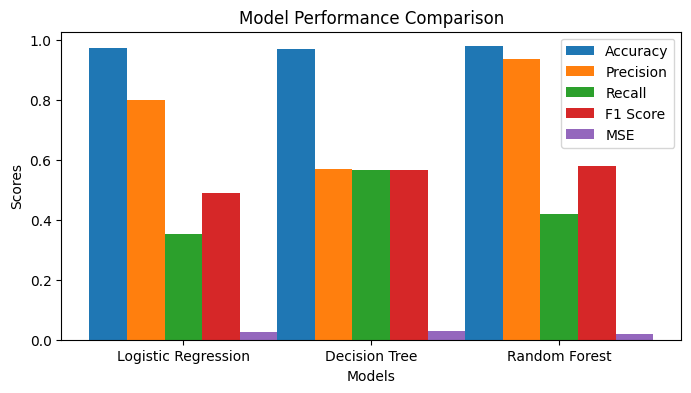

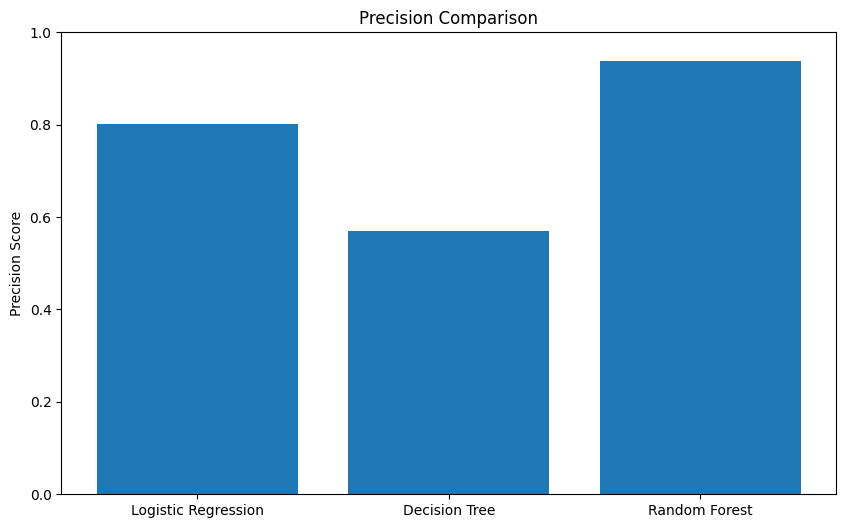

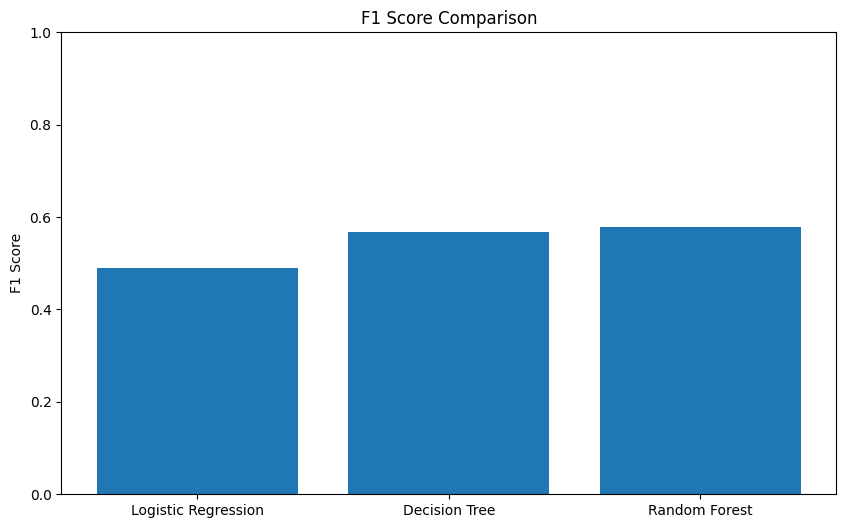

In [574]:

# Replace these with your actual scores
accuracy_scores = [mean(lst_accu_stratified1), mean(lst_accu_stratified2), mean(lst_accu_stratified3)]
precision_scores = [mean(P1), mean(P2), mean(P3)]
recall_scores = [mean(R1), mean(R2), mean(R3)]
f1_scores = [mean(F1), mean(F2), mean(F3)]
mse_scores = [mean(M1), mean(M2), mean(M3)]

models = ['Logistic Regression', 'Decision Tree', 'Random Forest']




bar_width = 0.2
index = np.arange(len(models))

# Plotting all scores in one graph
plt.figure(figsize=(8, 4))

plt.bar(index - 2*bar_width, accuracy_scores, bar_width, label='Accuracy')
plt.bar(index - bar_width, precision_scores, bar_width, label='Precision' )
plt.bar(index, recall_scores, bar_width, label='Recall')
plt.bar(index + bar_width, f1_scores, bar_width, label='F1 Score' )
plt.bar(index + 2*bar_width, mse_scores, bar_width, label='MSE')

plt.title('Model Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(index, models)
plt.legend()

plt.show()

# Plotting precision scores
plt.figure(figsize=(10, 6))
plt.bar(models, precision_scores)
plt.title('Precision Comparison')
plt.ylim(0, 1)
plt.ylabel('Precision Score')
plt.show()

# Plotting recall scores
plt.figure(figsize=(10, 6))
plt.bar(models, recall_scores)
plt.title('Recall Comparison')
plt.ylim(0, 1)
plt.ylabel('Recall Score')
plt.show()

# Plotting F1 scores
plt.figure(figsize=(10, 6))
plt.bar(models, f1_scores)
plt.title('F1 Score Comparison')
plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.show()


